# 🌍 Global Air Quality Analysis - Semester Project

## CSC380 Introduction to Data Science | Fall 2025
### University of Engineering and Technology, Lahore

---

**Project Overview:**
This comprehensive analysis explores the Global Air Quality Dataset containing 10,000 records from major cities worldwide. The dataset includes crucial environmental indicators (PM2.5, PM10, NO2, SO2, CO, O3) along with meteorological data.

**Objectives:**
1. 📊 Analyze air quality trends and patterns
2. 🤖 Build predictive models for AQI/pollutant levels
3. 🏥 Understand the impact of pollution on health
4. 💡 Suggest strategies for environmental improvement

---

## Table of Contents
1. [Data Preprocessing & Cleaning](#section-1)
2. [Exploratory Data Analysis (EDA)](#section-2)
3. [Model Building & Prediction](#section-3)
4. [Model Interpretation & Recommendations](#section-4)

## Section 1: Import Required Libraries
Import all necessary libraries for data manipulation, visualization, and machine learning.

In [1]:
# ============================================================
# IMPORT REQUIRED LIBRARIES
# ============================================================

# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Date and Time handling
from datetime import datetime

# Statistical Analysis
from scipy import stats
from scipy.stats import zscore

# Machine Learning - Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# Machine Learning - Models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

# Machine Learning - Evaluation Metrics
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, classification_report, roc_curve, auc,
                             mean_absolute_error, mean_squared_error, r2_score)

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', '{:.2f}'.format)

# Set visualization style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

print("✅ All libraries imported successfully!")
print(f"📦 Pandas version: {pd.__version__}")
print(f"📦 NumPy version: {np.__version__}")

✅ All libraries imported successfully!
📦 Pandas version: 2.3.3
📦 NumPy version: 2.3.5


## 📂 Section 2: Load and Inspect Dataset
Load the Global Air Quality dataset and perform initial exploration to understand its structure, data types, and basic statistics.

**Note:** Download the dataset from [Kaggle](https://www.kaggle.com/datasets/waqi786/global-air-quality-dataset/data) and place it in the same directory as this notebook.

In [2]:
# ============================================================
# LOAD THE DATASET
# ============================================================

# Load the dataset (update the path if needed)
df = pd.read_csv('global_air_quality_dataset.csv')

# Create a copy for reference
df_original = df.copy()

# Display basic information
print("=" * 60)
print("📊 DATASET OVERVIEW")
print("=" * 60)
print(f"\n📏 Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"💾 Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Display first few rows
print("\n" + "=" * 60)
print("🔍 FIRST 5 ROWS OF THE DATASET")
print("=" * 60)
df.head()

📊 DATASET OVERVIEW

📏 Dataset Shape: 10000 rows × 12 columns
💾 Memory Usage: 2.31 MB

🔍 FIRST 5 ROWS OF THE DATASET


City   Country        Date  PM2.5   PM10   NO2   SO2   CO     O3  \
0         Bangkok  Thailand  2023-03-19  86.57  25.19 99.88 30.63 4.46  36.29   
1        Istanbul    Turkey  2023-02-16  50.63  97.39 48.14  8.71 3.40 144.16   
2  Rio de Janeiro    Brazil  2023-11-13 130.21  57.22 98.51  9.92 0.12 179.31   
3          Mumbai     India  2023-03-16 119.70 130.52 10.96 33.03 7.74  38.65   
4           Paris    France  2023-04-04  55.20  36.62 76.85 21.85 2.00  67.09   

   Temperature  Humidity  Wind Speed  
0        17.67     59.35       13.76  
1         3.46     67.51        6.36  
2        25.29     29.30       12.87  
3        23.15     99.97        7.71  
4        16.02     90.28       14.16

In [3]:
# ============================================================
# DATA TYPES AND STRUCTURE
# ============================================================

print("=" * 60)
print("📋 DATASET INFORMATION")
print("=" * 60)
df.info()

print("\n" + "=" * 60)
print("📊 COLUMN DATA TYPES")
print("=" * 60)
for col in df.columns:
    print(f"  • {col}: {df[col].dtype}")

📋 DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         10000 non-null  object 
 1   Country      10000 non-null  object 
 2   Date         10000 non-null  object 
 3   PM2.5        10000 non-null  float64
 4   PM10         10000 non-null  float64
 5   NO2          10000 non-null  float64
 6   SO2          10000 non-null  float64
 7   CO           10000 non-null  float64
 8   O3           10000 non-null  float64
 9   Temperature  10000 non-null  float64
 10  Humidity     10000 non-null  float64
 11  Wind Speed   10000 non-null  float64
dtypes: float64(9), object(3)
memory usage: 937.6+ KB

📊 COLUMN DATA TYPES
  • City: object
  • Country: object
  • Date: object
  • PM2.5: float64
  • PM10: float64
  • NO2: float64
  • SO2: float64
  • CO: float64
  • O3: float64
  • Temperature: float64
  • Humidity: float64
  •

In [ ]:
# ============================================================
# STATISTICAL SUMMARY
# ============================================================

print("=" * 60)
print("📈 STATISTICAL SUMMARY OF NUMERICAL FEATURES")
print("=" * 60)
df.describe().T

In [ ]:
# ============================================================
# UNIQUE VALUES IN CATEGORICAL COLUMNS
# ============================================================

print("=" * 60)
print("🏙️ UNIQUE CITIES AND COUNTRIES")
print("=" * 60)
print(f"\n📍 Number of Unique Cities: {df['City'].nunique()}")
print(f"🌍 Number of Unique Countries: {df['Country'].nunique()}")

print("\n📍 Cities in Dataset:")
print(df['City'].unique())

print("\n🌍 Countries in Dataset:")
print(df['Country'].unique())

---
# 🧹 PART 1: DATA PREPROCESSING & CLEANING
---

## 1.1 Handle Missing Values
Check for missing values and apply appropriate imputation strategies.

🔍 MISSING VALUES ANALYSIS

📊 Missing Values Summary:
             Missing Values  Percentage (%)
City                      0            0.00
Country                   0            0.00
Date                      0            0.00
PM2.5                     0            0.00
PM10                      0            0.00
NO2                       0            0.00
SO2                       0            0.00
CO                        0            0.00
O3                        0            0.00
Temperature               0            0.00
Humidity                  0            0.00
Wind Speed                0            0.00


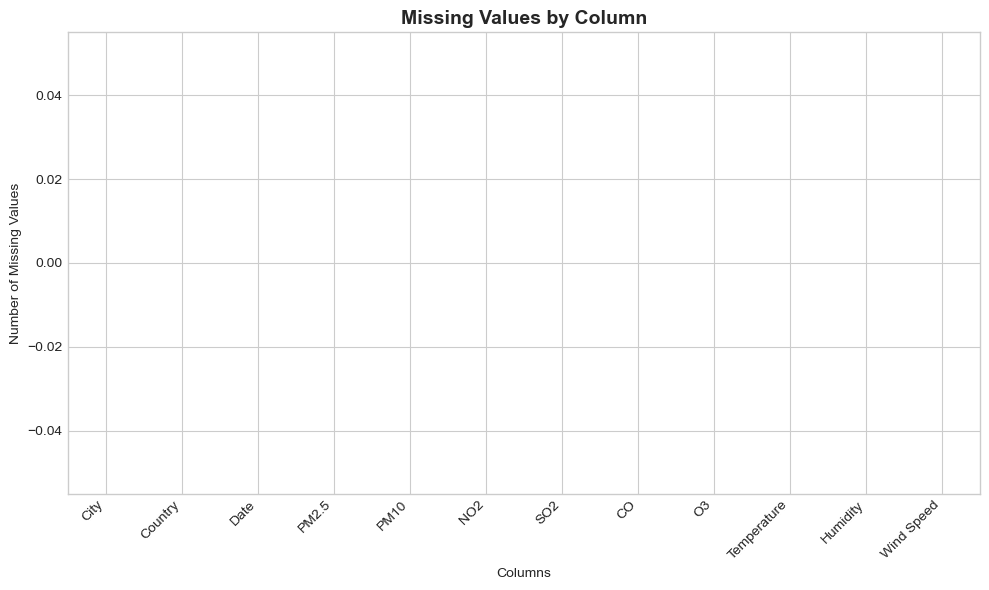


✅ Total Missing Values: 0


In [4]:
# ============================================================
# CHECK FOR MISSING VALUES
# ============================================================

print("=" * 60)
print("🔍 MISSING VALUES ANALYSIS")
print("=" * 60)

# Count missing values
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Create a summary DataFrame
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
}).sort_values(by='Missing Values', ascending=False)

print("\n📊 Missing Values Summary:")
print(missing_df)

# Visualize missing values
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['#ff6b6b' if val > 0 else '#4ecdc4' for val in missing_values]
missing_values.plot(kind='bar', ax=ax, color=colors)
plt.title('Missing Values by Column', fontsize=14, fontweight='bold')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(f"\n✅ Total Missing Values: {df.isnull().sum().sum()}")

In [5]:
# ============================================================
# HANDLE MISSING VALUES USING IMPUTATION
# ============================================================

print("=" * 60)
print("🔧 HANDLING MISSING VALUES")
print("=" * 60)

# Define numerical and categorical columns
numerical_cols = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'Temperature', 'Humidity', 'Wind Speed']
categorical_cols = ['City', 'Country']

# Impute numerical columns with median (robust to outliers)
print("\n📊 Imputing numerical columns with MEDIAN...")
for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"  • {col}: Imputed with median = {median_val:.2f}")

# Impute categorical columns with mode
print("\n📊 Imputing categorical columns with MODE...")
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)
        print(f"  • {col}: Imputed with mode = {mode_val}")

# Verify no missing values remain
print("\n" + "=" * 60)
print("✅ VERIFICATION - Missing Values After Imputation:")
print("=" * 60)
print(df.isnull().sum())
print(f"\n✅ Total Missing Values After Cleaning: {df.isnull().sum().sum()}")

🔧 HANDLING MISSING VALUES

📊 Imputing numerical columns with MEDIAN...

📊 Imputing categorical columns with MODE...

✅ VERIFICATION - Missing Values After Imputation:
City           0
Country        0
Date           0
PM2.5          0
PM10           0
NO2            0
SO2            0
CO             0
O3             0
Temperature    0
Humidity       0
Wind Speed     0
dtype: int64

✅ Total Missing Values After Cleaning: 0


## 1.2 Detect and Handle Outliers
Use IQR (Interquartile Range) and Z-score methods to detect and handle outliers in pollutant measurements.

📊 OUTLIER DETECTION - BOX PLOTS (BEFORE TREATMENT)


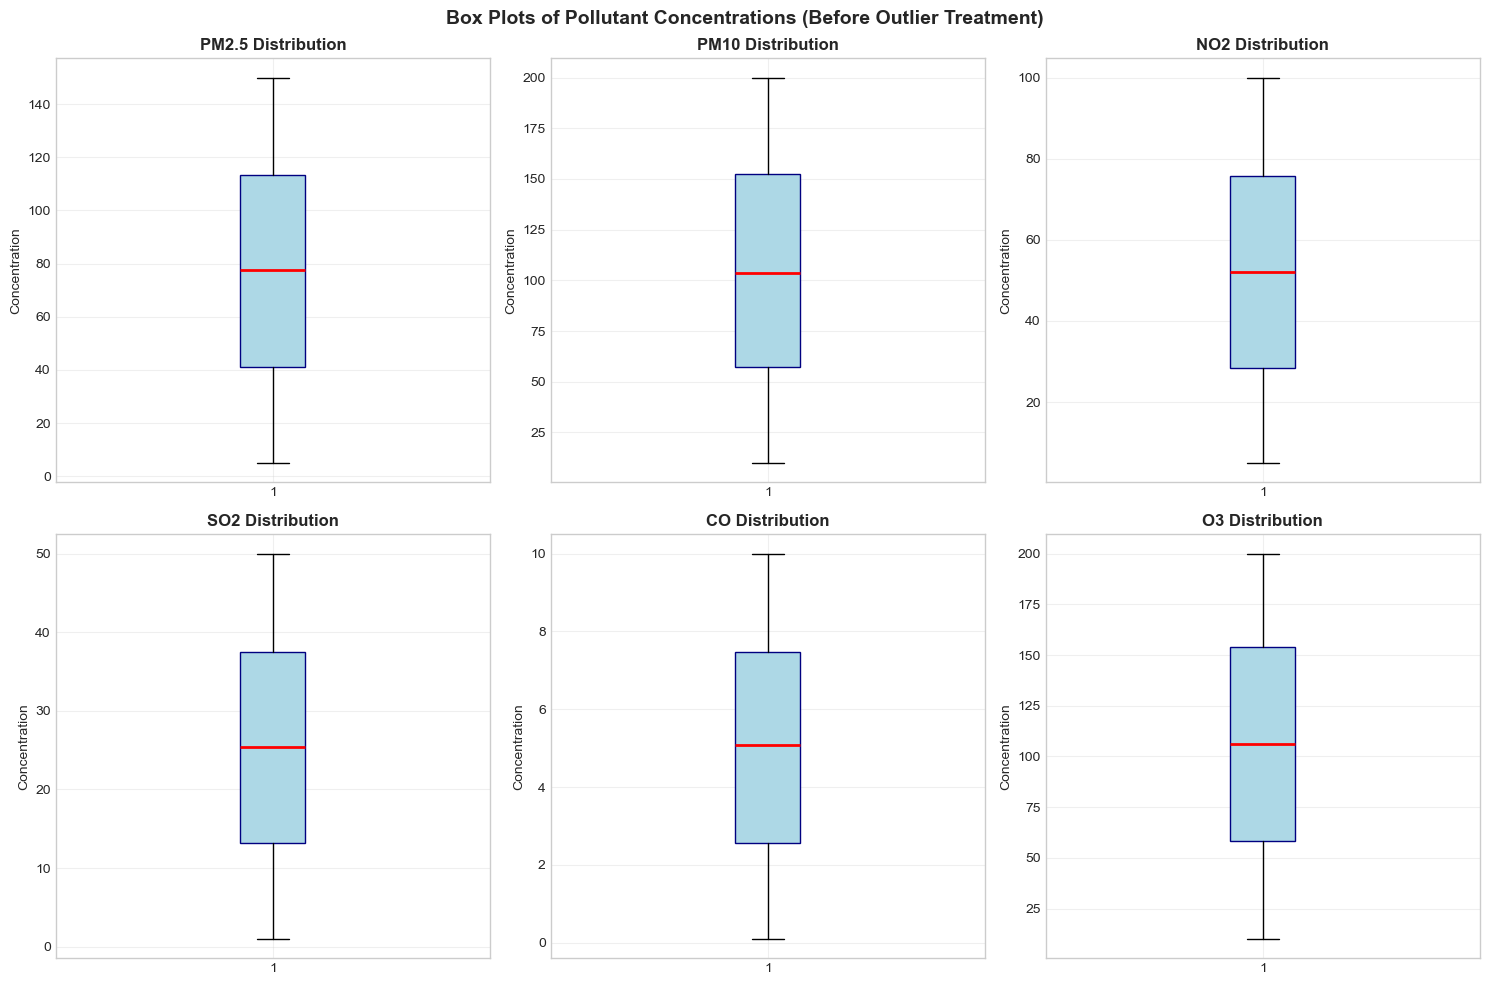

In [6]:
# ============================================================
# VISUALIZE OUTLIERS USING BOX PLOTS (BEFORE TREATMENT)
# ============================================================

print("=" * 60)
print("📊 OUTLIER DETECTION - BOX PLOTS (BEFORE TREATMENT)")
print("=" * 60)

# Pollutant columns to check for outliers
pollutant_cols = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']
weather_cols = ['Temperature', 'Humidity', 'Wind Speed']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, col in enumerate(pollutant_cols):
    axes[idx].boxplot(df[col], patch_artist=True, 
                      boxprops=dict(facecolor='lightblue', color='navy'),
                      medianprops=dict(color='red', linewidth=2))
    axes[idx].set_title(f'{col} Distribution', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Concentration')
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Box Plots of Pollutant Concentrations (Before Outlier Treatment)', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [7]:
# ============================================================
# OUTLIER DETECTION USING IQR METHOD
# ============================================================

def detect_outliers_iqr(data, column):
    """
    Detect outliers using IQR (Interquartile Range) method.
    Outliers are values below Q1 - 1.5*IQR or above Q3 + 1.5*IQR
    """
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

print("=" * 60)
print("📊 OUTLIER DETECTION USING IQR METHOD")
print("=" * 60)

outlier_summary = []
for col in numerical_cols:
    outliers, lb, ub = detect_outliers_iqr(df, col)
    outlier_count = len(outliers)
    outlier_pct = (outlier_count / len(df)) * 100
    outlier_summary.append({
        'Column': col,
        'Lower Bound': lb,
        'Upper Bound': ub,
        'Outliers Count': outlier_count,
        'Percentage (%)': outlier_pct
    })

outlier_df = pd.DataFrame(outlier_summary)
print("\n📊 IQR Outlier Detection Summary:")
print(outlier_df.to_string(index=False))

📊 OUTLIER DETECTION USING IQR METHOD

📊 IQR Outlier Detection Summary:
     Column  Lower Bound  Upper Bound  Outliers Count  Percentage (%)
      PM2.5       -67.13       221.70               0            0.00
       PM10       -85.55       294.96               0            0.00
        NO2       -42.69       146.74               0            0.00
        SO2       -23.28        73.97               0            0.00
         CO        -4.82        14.86               0            0.00
         O3       -85.02       297.39               0            0.00
Temperature       -35.43        65.07               0            0.00
   Humidity       -34.84       144.81               0            0.00
 Wind Speed        -9.38        29.74               0            0.00


In [8]:
# ============================================================
# OUTLIER DETECTION USING Z-SCORE METHOD
# ============================================================

def detect_outliers_zscore(data, column, threshold=3):
    """
    Detect outliers using Z-score method.
    Outliers are values with |Z-score| > threshold (default=3)
    """
    z_scores = np.abs(zscore(data[column]))
    outliers = data[z_scores > threshold]
    return outliers, z_scores

print("=" * 60)
print("📊 OUTLIER DETECTION USING Z-SCORE METHOD (Threshold = 3)")
print("=" * 60)

zscore_summary = []
for col in numerical_cols:
    outliers, z_scores = detect_outliers_zscore(df, col)
    outlier_count = len(outliers)
    outlier_pct = (outlier_count / len(df)) * 100
    zscore_summary.append({
        'Column': col,
        'Outliers Count': outlier_count,
        'Percentage (%)': outlier_pct
    })

zscore_df = pd.DataFrame(zscore_summary)
print("\n📊 Z-Score Outlier Detection Summary:")
print(zscore_df.to_string(index=False))

📊 OUTLIER DETECTION USING Z-SCORE METHOD (Threshold = 3)

📊 Z-Score Outlier Detection Summary:
     Column  Outliers Count  Percentage (%)
      PM2.5               0            0.00
       PM10               0            0.00
        NO2               0            0.00
        SO2               0            0.00
         CO               0            0.00
         O3               0            0.00
Temperature               0            0.00
   Humidity               0            0.00
 Wind Speed               0            0.00


In [9]:
# ============================================================
# HANDLE OUTLIERS USING IQR CAPPING METHOD
# ============================================================

print("=" * 60)
print("🔧 HANDLING OUTLIERS USING IQR CAPPING")
print("=" * 60)

def cap_outliers_iqr(data, column):
    """
    Cap outliers using IQR method (Winsorization).
    Values below lower bound are set to lower bound.
    Values above upper bound are set to upper bound.
    """
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers before capping
    outliers_before = len(data[(data[column] < lower_bound) | (data[column] > upper_bound)])
    
    # Cap the outliers
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])
    
    return outliers_before, lower_bound, upper_bound

print("\n📊 Capping outliers in numerical columns...")
for col in numerical_cols:
    outliers_before, lb, ub = cap_outliers_iqr(df, col)
    if outliers_before > 0:
        print(f"  • {col}: Capped {outliers_before} outliers (bounds: [{lb:.2f}, {ub:.2f}])")

print("\n✅ Outlier treatment completed!")

🔧 HANDLING OUTLIERS USING IQR CAPPING

📊 Capping outliers in numerical columns...

✅ Outlier treatment completed!


📊 BOX PLOTS AFTER OUTLIER TREATMENT


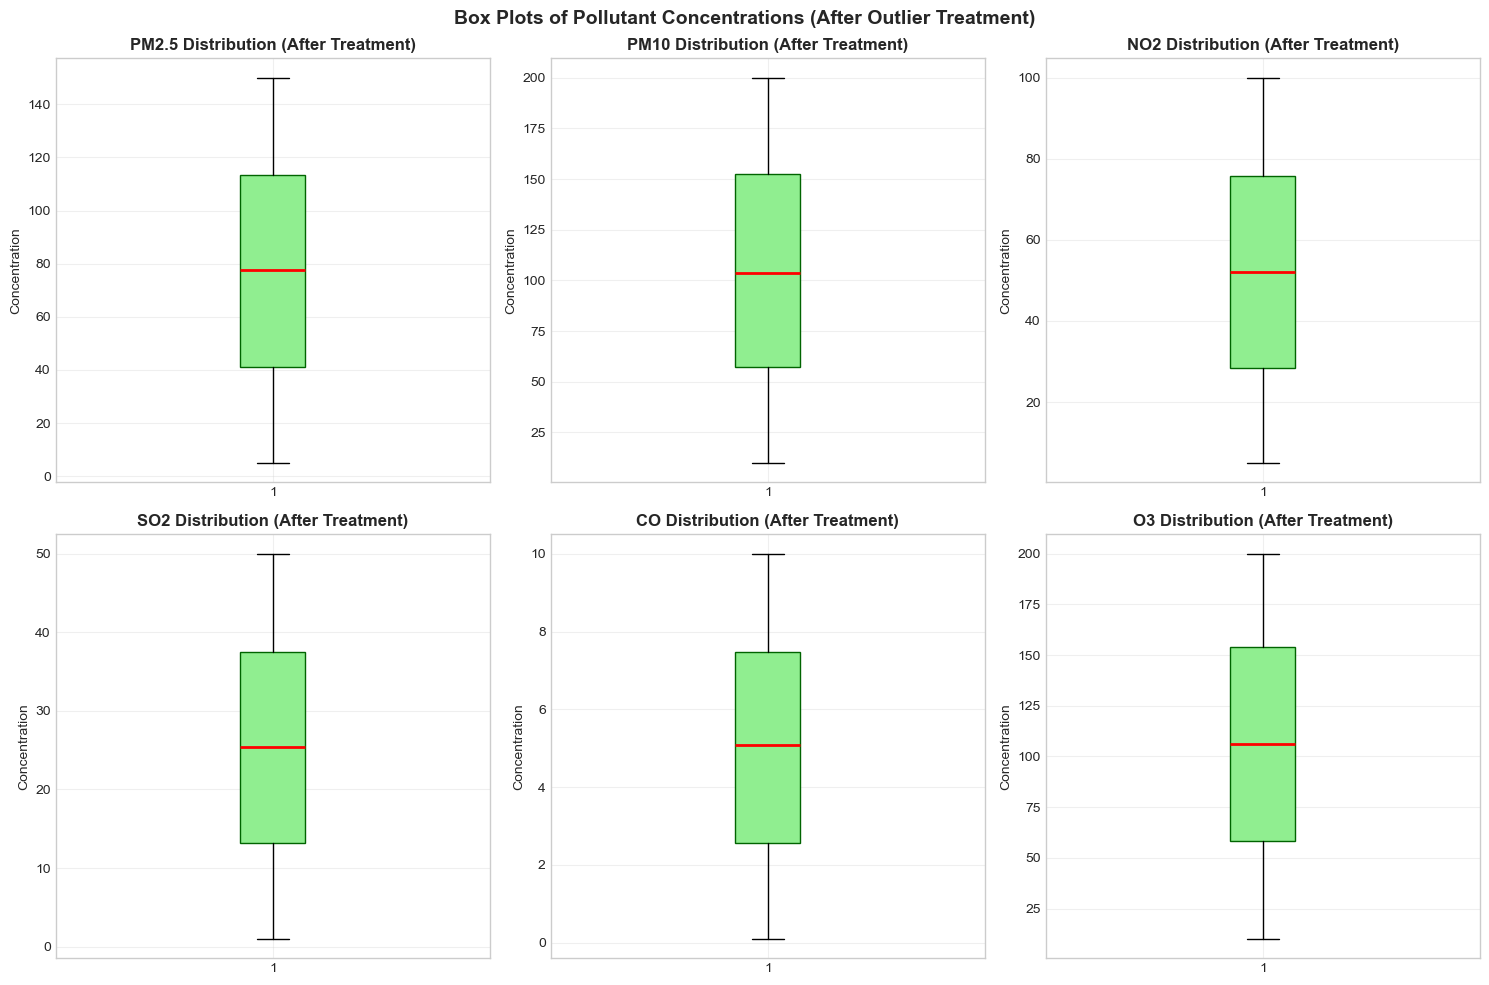

In [10]:
# ============================================================
# VISUALIZE DATA AFTER OUTLIER TREATMENT
# ============================================================

print("=" * 60)
print("📊 BOX PLOTS AFTER OUTLIER TREATMENT")
print("=" * 60)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, col in enumerate(pollutant_cols):
    axes[idx].boxplot(df[col], patch_artist=True, 
                      boxprops=dict(facecolor='lightgreen', color='darkgreen'),
                      medianprops=dict(color='red', linewidth=2))
    axes[idx].set_title(f'{col} Distribution (After Treatment)', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Concentration')
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Box Plots of Pollutant Concentrations (After Outlier Treatment)', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 1.3 Feature Engineering - Calculate and Categorize AQI
Calculate the Air Quality Index (AQI) based on pollutant concentrations and create categorical labels.

**AQI Categories:**
- 🟢 **Good (0-50):** Air quality is satisfactory
- 🟡 **Moderate (51-100):** Air quality is acceptable
- 🟠 **Unhealthy for Sensitive Groups (101-150):** Sensitive groups may experience health effects
- 🔴 **Unhealthy (151-200):** Everyone may begin to experience health effects
- 🟣 **Very Unhealthy (201-300):** Health alert
- 🟤 **Hazardous (>300):** Health emergency

In [11]:
# ============================================================
# CALCULATE AQI (Air Quality Index)
# ============================================================

print("=" * 60)
print("🌡️ CALCULATING AIR QUALITY INDEX (AQI)")
print("=" * 60)

def calculate_sub_index(concentration, breakpoints):
    """
    Calculate sub-index for a pollutant based on EPA breakpoints.
    """
    for bp in breakpoints:
        if bp['low'] <= concentration <= bp['high']:
            return ((bp['aqi_high'] - bp['aqi_low']) / (bp['high'] - bp['low'])) * (concentration - bp['low']) + bp['aqi_low']
    return breakpoints[-1]['aqi_high']  # Return max if above all breakpoints

# EPA breakpoints for PM2.5 (simplified)
pm25_breakpoints = [
    {'low': 0, 'high': 12, 'aqi_low': 0, 'aqi_high': 50},
    {'low': 12.1, 'high': 35.4, 'aqi_low': 51, 'aqi_high': 100},
    {'low': 35.5, 'high': 55.4, 'aqi_low': 101, 'aqi_high': 150},
    {'low': 55.5, 'high': 150.4, 'aqi_low': 151, 'aqi_high': 200},
    {'low': 150.5, 'high': 250.4, 'aqi_low': 201, 'aqi_high': 300},
    {'low': 250.5, 'high': 500, 'aqi_low': 301, 'aqi_high': 500}
]

# Calculate AQI based on PM2.5 (primary indicator)
# For simplicity, using PM2.5 as the main AQI indicator
df['AQI'] = df['PM2.5'].apply(lambda x: calculate_sub_index(x, pm25_breakpoints))

print(f"✅ AQI calculated based on PM2.5 concentration")
print(f"\n📊 AQI Statistics:")
print(df['AQI'].describe())

🌡️ CALCULATING AIR QUALITY INDEX (AQI)
✅ AQI calculated based on PM2.5 concentration

📊 AQI Statistics:
count   10000.00
mean      146.04
std        49.25
min        20.92
25%       115.37
50%       162.62
75%       181.03
max       500.00
Name: AQI, dtype: float64


🏷️ CATEGORIZING AQI INTO LABELS

📊 AQI Category Distribution:
AQI_Category
Unhealthy                         6498
Moderate                          1609
Unhealthy for Sensitive Groups    1380
Good                               497
Hazardous                           16
Name: count, dtype: int64

📊 Percentage Distribution:
AQI_Category
Unhealthy                        64.98
Moderate                         16.09
Unhealthy for Sensitive Groups   13.80
Good                              4.97
Hazardous                         0.16
Name: proportion, dtype: float64


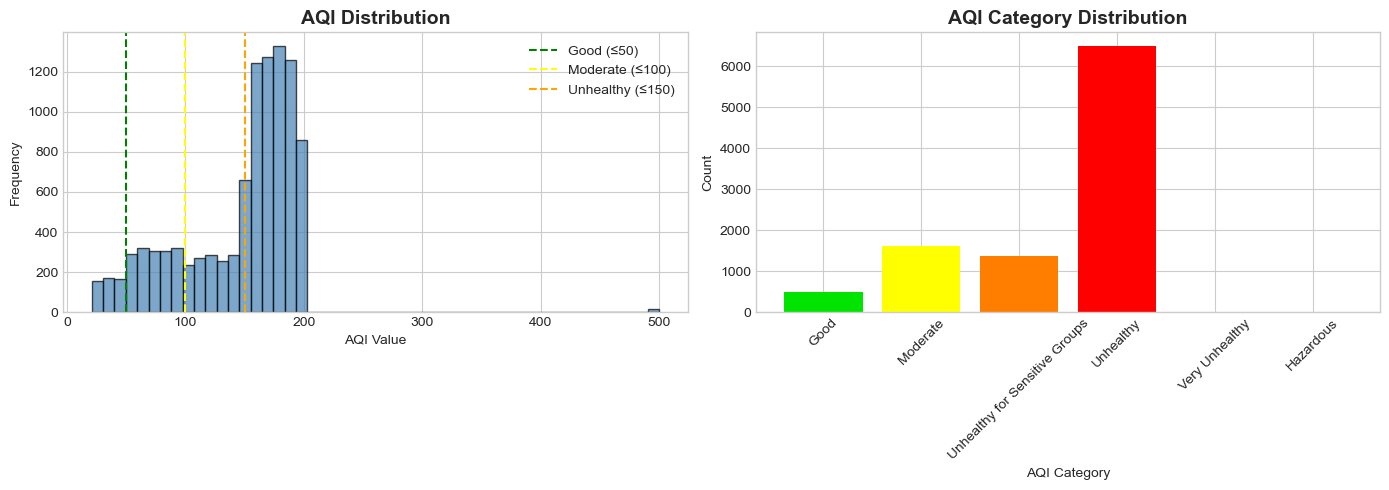

In [12]:
# ============================================================
# CATEGORIZE AQI INTO LABELS
# ============================================================

print("=" * 60)
print("🏷️ CATEGORIZING AQI INTO LABELS")
print("=" * 60)

def categorize_aqi(aqi_value):
    """
    Categorize AQI value into health categories.
    """
    if aqi_value <= 50:
        return 'Good'
    elif aqi_value <= 100:
        return 'Moderate'
    elif aqi_value <= 150:
        return 'Unhealthy for Sensitive Groups'
    elif aqi_value <= 200:
        return 'Unhealthy'
    elif aqi_value <= 300:
        return 'Very Unhealthy'
    else:
        return 'Hazardous'

# Create AQI Category column
df['AQI_Category'] = df['AQI'].apply(categorize_aqi)

# Display category distribution
print("\n📊 AQI Category Distribution:")
print(df['AQI_Category'].value_counts())
print(f"\n📊 Percentage Distribution:")
print((df['AQI_Category'].value_counts(normalize=True) * 100).round(2))

# Visualize AQI distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# AQI Distribution Histogram
axes[0].hist(df['AQI'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_title('AQI Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('AQI Value')
axes[0].set_ylabel('Frequency')
axes[0].axvline(x=50, color='green', linestyle='--', label='Good (≤50)')
axes[0].axvline(x=100, color='yellow', linestyle='--', label='Moderate (≤100)')
axes[0].axvline(x=150, color='orange', linestyle='--', label='Unhealthy (≤150)')
axes[0].legend()

# AQI Category Bar Chart
category_order = ['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous']
colors = ['#00e400', '#ffff00', '#ff7e00', '#ff0000', '#8f3f97', '#7e0023']
category_counts = df['AQI_Category'].value_counts().reindex(category_order).fillna(0)
bars = axes[1].bar(category_counts.index, category_counts.values, color=colors[:len(category_counts)])
axes[1].set_title('AQI Category Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('AQI Category')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [13]:
# ============================================================
# ENCODE AQI CATEGORY FOR CLASSIFICATION
# ============================================================

print("=" * 60)
print("🔢 ENCODING AQI CATEGORIES")
print("=" * 60)

# Create a simplified category for better model performance
def simplify_aqi_category(category):
    """
    Simplify AQI categories into 4 main groups for classification.
    """
    if category == 'Good':
        return 0  # Good
    elif category == 'Moderate':
        return 1  # Moderate
    elif category in ['Unhealthy for Sensitive Groups', 'Unhealthy']:
        return 2  # Unhealthy
    else:
        return 3  # Hazardous (Very Unhealthy + Hazardous)

df['AQI_Encoded'] = df['AQI_Category'].apply(simplify_aqi_category)

# Label mapping for reference
label_mapping = {0: 'Good', 1: 'Moderate', 2: 'Unhealthy', 3: 'Hazardous'}

print("\n📊 Encoded AQI Distribution:")
for code, label in label_mapping.items():
    count = (df['AQI_Encoded'] == code).sum()
    pct = (count / len(df)) * 100
    print(f"  {code} ({label}): {count} records ({pct:.2f}%)")

🔢 ENCODING AQI CATEGORIES

📊 Encoded AQI Distribution:
  0 (Good): 497 records (4.97%)
  1 (Moderate): 1609 records (16.09%)
  2 (Unhealthy): 7878 records (78.78%)
  3 (Hazardous): 16 records (0.16%)


## 1.4 Feature Scaling
Apply StandardScaler (Standardization) and MinMaxScaler (Normalization) to numerical features.

In [14]:
# ============================================================
# FEATURE SCALING - STANDARDIZATION & NORMALIZATION
# ============================================================

print("=" * 60)
print("📏 FEATURE SCALING")
print("=" * 60)

# Features to scale
features_to_scale = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'Temperature', 'Humidity', 'Wind Speed']

# Create copies for different scaling methods
df_standardized = df.copy()
df_normalized = df.copy()

# Initialize scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Apply Standardization (Z-score normalization)
print("\n📊 Applying StandardScaler (Standardization)...")
df_standardized[features_to_scale] = standard_scaler.fit_transform(df[features_to_scale])

# Apply Normalization (Min-Max scaling)
print("📊 Applying MinMaxScaler (Normalization)...")
df_normalized[features_to_scale] = minmax_scaler.fit_transform(df[features_to_scale])

# Display comparison
print("\n" + "=" * 60)
print("📊 COMPARISON OF SCALING METHODS")
print("=" * 60)

comparison_data = {
    'Feature': features_to_scale,
    'Original Mean': [df[col].mean() for col in features_to_scale],
    'Original Std': [df[col].std() for col in features_to_scale],
    'Standardized Mean': [df_standardized[col].mean() for col in features_to_scale],
    'Standardized Std': [df_standardized[col].std() for col in features_to_scale],
    'Normalized Min': [df_normalized[col].min() for col in features_to_scale],
    'Normalized Max': [df_normalized[col].max() for col in features_to_scale]
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))

📏 FEATURE SCALING

📊 Applying StandardScaler (Standardization)...
📊 Applying MinMaxScaler (Normalization)...

📊 COMPARISON OF SCALING METHODS
    Feature  Original Mean  Original Std  Standardized Mean  Standardized Std  Normalized Min  Normalized Max
      PM2.5          77.45         41.93              -0.00              1.00            0.00            1.00
       PM10         104.44         55.06              -0.00              1.00            0.00            1.00
        NO2          52.20         27.32               0.00              1.00            0.00            1.00
        SO2          25.34         14.09              -0.00              1.00            0.00            1.00
         CO           5.05          2.85               0.00              1.00            0.00            1.00
         O3         106.03         55.08              -0.00              1.00            0.00            1.00
Temperature          14.90         14.44               0.00              1.00           

📊 SCALING COMPARISON VISUALIZATION


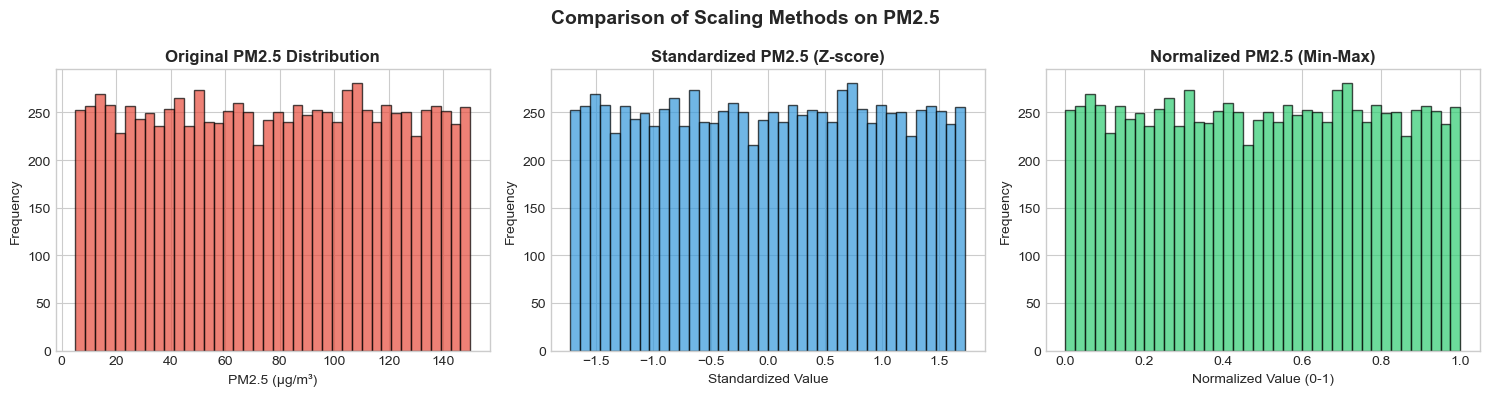


✅ StandardScaler will be used for modeling (preserves distribution shape)


In [15]:
# ============================================================
# VISUALIZE SCALING COMPARISON
# ============================================================

print("=" * 60)
print("📊 SCALING COMPARISON VISUALIZATION")
print("=" * 60)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Original Distribution (PM2.5 as example)
axes[0].hist(df['PM2.5'], bins=40, color='#e74c3c', alpha=0.7, edgecolor='black')
axes[0].set_title('Original PM2.5 Distribution', fontweight='bold')
axes[0].set_xlabel('PM2.5 (μg/m³)')
axes[0].set_ylabel('Frequency')

# Standardized Distribution
axes[1].hist(df_standardized['PM2.5'], bins=40, color='#3498db', alpha=0.7, edgecolor='black')
axes[1].set_title('Standardized PM2.5 (Z-score)', fontweight='bold')
axes[1].set_xlabel('Standardized Value')
axes[1].set_ylabel('Frequency')

# Normalized Distribution
axes[2].hist(df_normalized['PM2.5'], bins=40, color='#2ecc71', alpha=0.7, edgecolor='black')
axes[2].set_title('Normalized PM2.5 (Min-Max)', fontweight='bold')
axes[2].set_xlabel('Normalized Value (0-1)')
axes[2].set_ylabel('Frequency')

plt.suptitle('Comparison of Scaling Methods on PM2.5', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n✅ StandardScaler will be used for modeling (preserves distribution shape)")

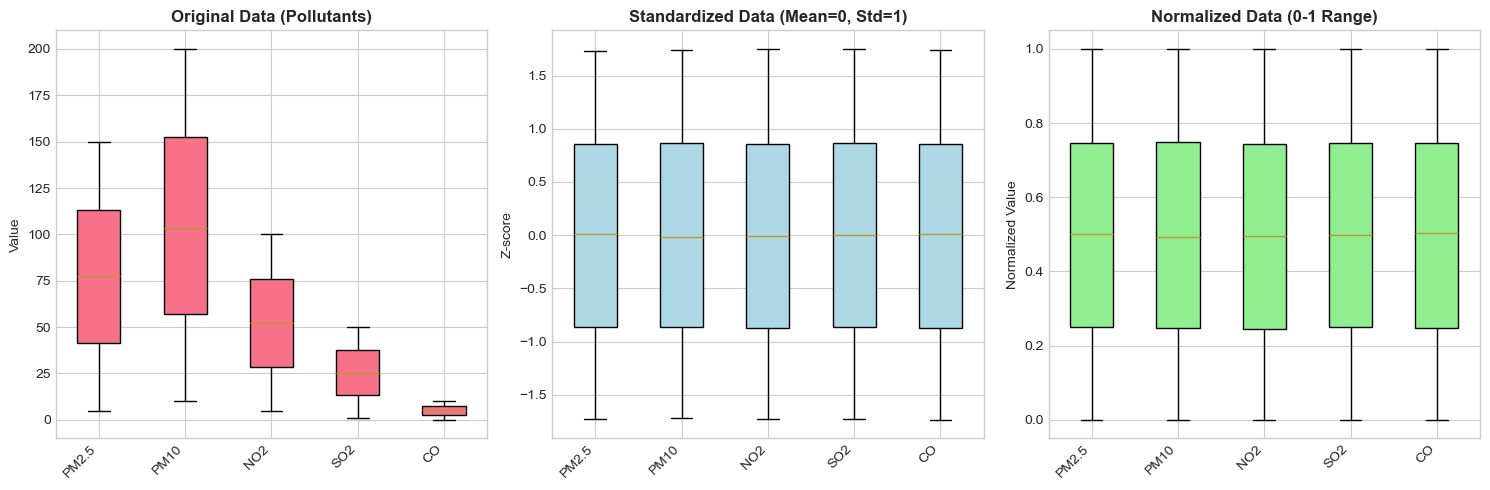


✅ Feature scaling completed!


In [16]:
# ============================================================
# VISUALIZE SCALING COMPARISON
# ============================================================

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original Data
axes[0].boxplot([df[col] for col in features_to_scale[:5]], patch_artist=True)
axes[0].set_xticklabels(features_to_scale[:5], rotation=45, ha='right')
axes[0].set_title('Original Data (Pollutants)', fontweight='bold')
axes[0].set_ylabel('Value')

# Standardized Data
axes[1].boxplot([df_standardized[col] for col in features_to_scale[:5]], patch_artist=True,
                boxprops=dict(facecolor='lightblue'))
axes[1].set_xticklabels(features_to_scale[:5], rotation=45, ha='right')
axes[1].set_title('Standardized Data (Mean=0, Std=1)', fontweight='bold')
axes[1].set_ylabel('Z-score')

# Normalized Data
axes[2].boxplot([df_normalized[col] for col in features_to_scale[:5]], patch_artist=True,
                boxprops=dict(facecolor='lightgreen'))
axes[2].set_xticklabels(features_to_scale[:5], rotation=45, ha='right')
axes[2].set_title('Normalized Data (0-1 Range)', fontweight='bold')
axes[2].set_ylabel('Normalized Value')

plt.tight_layout()
plt.show()

print("\n✅ Feature scaling completed!")

## 1.5 Train-Test Split
Split the dataset into 80% training and 20% testing sets for model development.

In [17]:
# ============================================================
# TRAIN-TEST SPLIT (80% Training, 20% Testing)
# ============================================================

print("=" * 60)
print("📊 TRAIN-TEST SPLIT")
print("=" * 60)

# Define features (X) and target (y)
feature_columns = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'Temperature', 'Humidity', 'Wind Speed']

# For Classification: Use AQI_Encoded as target
X = df[feature_columns]
y_classification = df['AQI_Encoded']

# For Regression: Use AQI as target
y_regression = df['AQI']

# Split for Classification
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X, y_classification, test_size=0.2, random_state=42, stratify=y_classification
)

# Split for Regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X, y_regression, test_size=0.2, random_state=42
)

# Scale features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_clf)
X_test_scaled = scaler.transform(X_test_clf)

X_train_reg_scaled = scaler.fit_transform(X_train_reg)
X_test_reg_scaled = scaler.transform(X_test_reg)

print(f"\n📊 Dataset Split Summary:")
print(f"  • Total samples: {len(X)}")
print(f"  • Training samples: {len(X_train_clf)} (80%)")
print(f"  • Testing samples: {len(X_test_clf)} (20%)")

print(f"\n📊 Class Distribution in Training Set (Classification):")
for label, name in label_mapping.items():
    count = (y_train_clf == label).sum()
    pct = (count / len(y_train_clf)) * 100
    print(f"  • {name}: {count} ({pct:.2f}%)")

print(f"\n📊 Class Distribution in Test Set (Classification):")
for label, name in label_mapping.items():
    count = (y_test_clf == label).sum()
    pct = (count / len(y_test_clf)) * 100
    print(f"  • {name}: {count} ({pct:.2f}%)")

print("\n✅ Train-Test split completed!")

📊 TRAIN-TEST SPLIT

📊 Dataset Split Summary:
  • Total samples: 10000
  • Training samples: 8000 (80%)
  • Testing samples: 2000 (20%)

📊 Class Distribution in Training Set (Classification):
  • Good: 398 (4.98%)
  • Moderate: 1287 (16.09%)
  • Unhealthy: 6302 (78.77%)
  • Hazardous: 13 (0.16%)

📊 Class Distribution in Test Set (Classification):
  • Good: 99 (4.95%)
  • Moderate: 322 (16.10%)
  • Unhealthy: 1576 (78.80%)
  • Hazardous: 3 (0.15%)

✅ Train-Test split completed!


---
# 📊 PART 2: EXPLORATORY DATA ANALYSIS (EDA)
---

## 2.1 Univariate Analysis
Analyze the distribution of individual variables using histograms, KDE plots, and descriptive statistics.

📊 UNIVARIATE ANALYSIS - POLLUTANT DISTRIBUTIONS


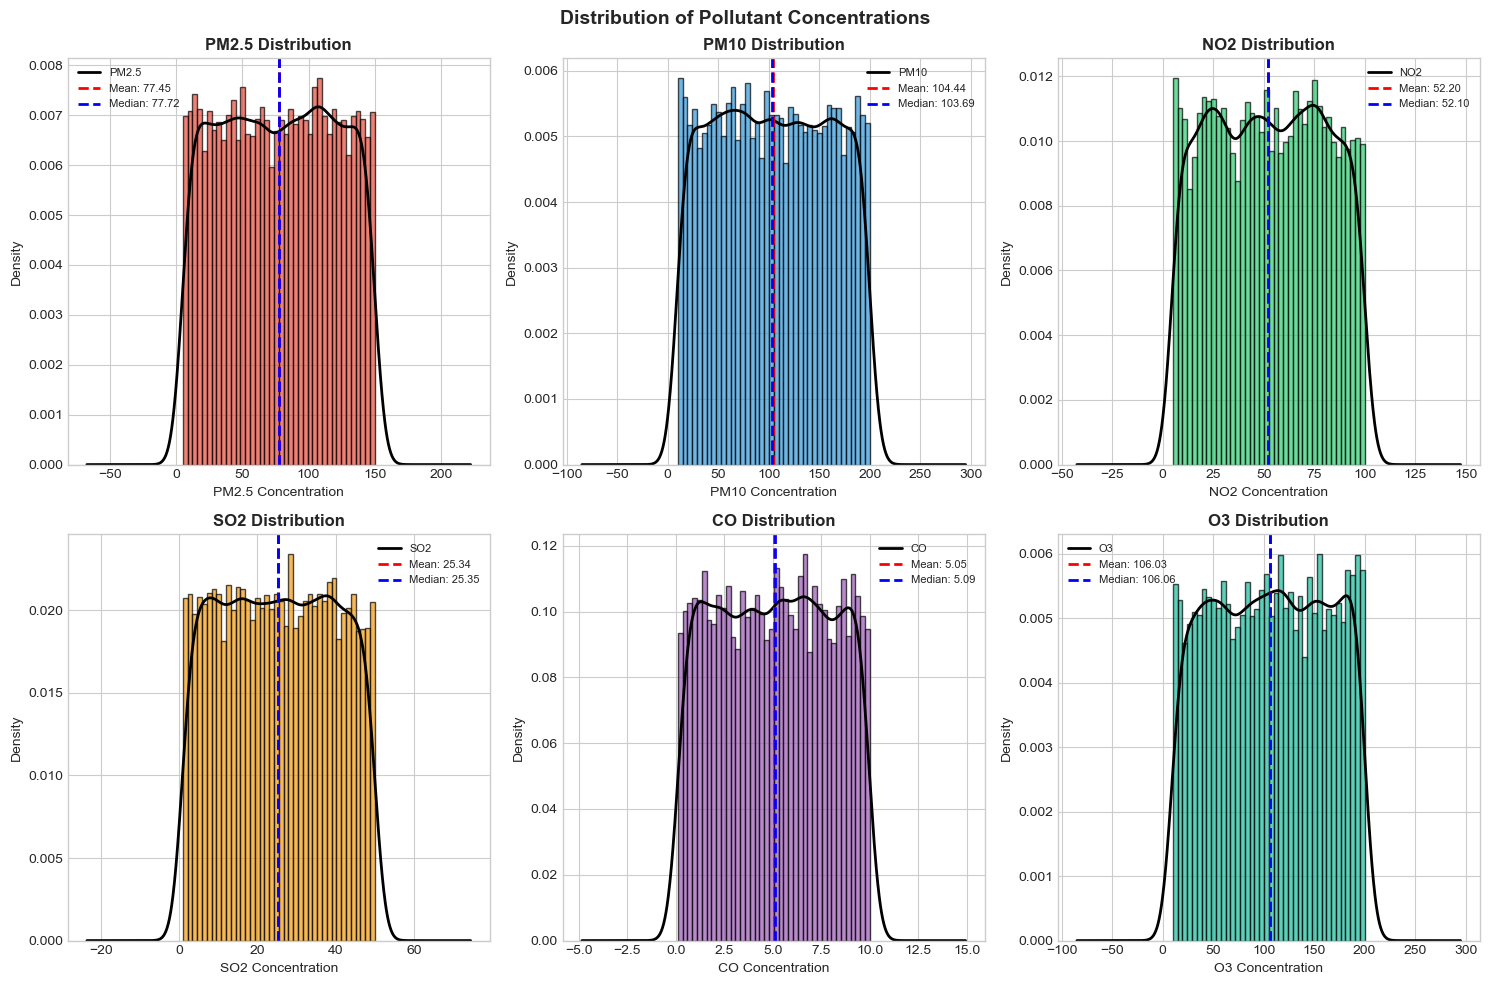

In [18]:
# ============================================================
# UNIVARIATE ANALYSIS - POLLUTANT DISTRIBUTIONS
# ============================================================

print("=" * 60)
print("📊 UNIVARIATE ANALYSIS - POLLUTANT DISTRIBUTIONS")
print("=" * 60)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

pollutant_colors = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12', '#9b59b6', '#1abc9c']

for idx, (col, color) in enumerate(zip(pollutant_cols, pollutant_colors)):
    # Histogram with KDE
    axes[idx].hist(df[col], bins=40, color=color, alpha=0.7, edgecolor='black', density=True)
    df[col].plot(kind='kde', ax=axes[idx], color='black', linewidth=2)
    
    # Add mean and median lines
    mean_val = df[col].mean()
    median_val = df[col].median()
    axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[idx].axvline(median_val, color='blue', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
    
    axes[idx].set_title(f'{col} Distribution', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(f'{col} Concentration')
    axes[idx].set_ylabel('Density')
    axes[idx].legend(fontsize=8)

plt.suptitle('Distribution of Pollutant Concentrations', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

📊 UNIVARIATE ANALYSIS - WEATHER CONDITIONS


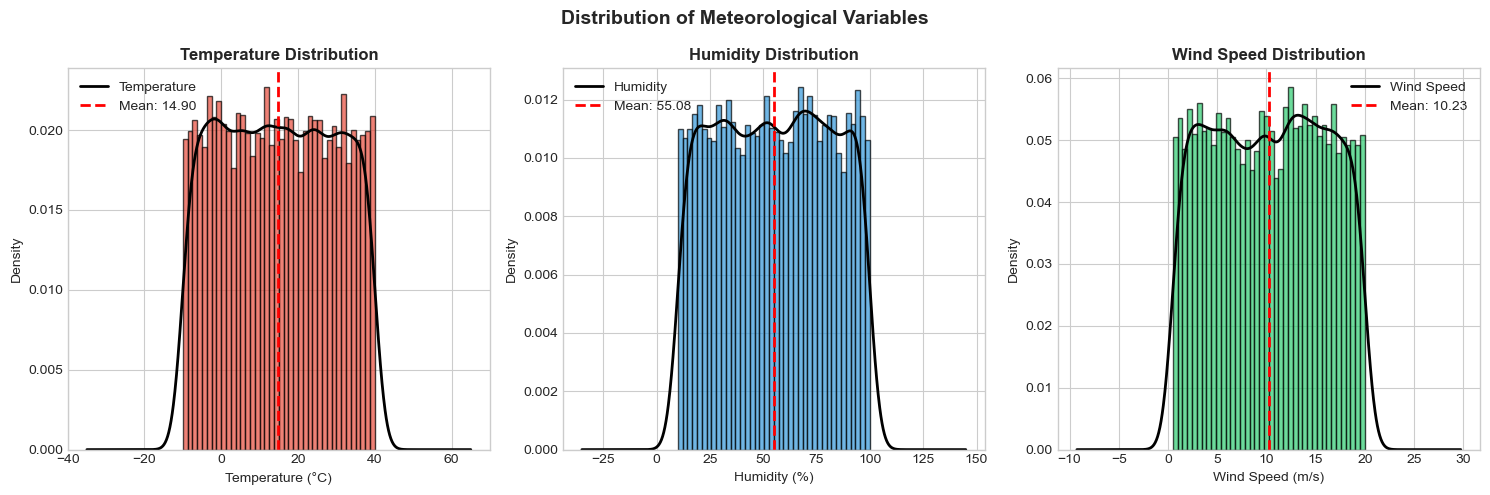

In [19]:
# ============================================================
# UNIVARIATE ANALYSIS - WEATHER CONDITIONS
# ============================================================

print("=" * 60)
print("📊 UNIVARIATE ANALYSIS - WEATHER CONDITIONS")
print("=" * 60)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

weather_data = [('Temperature', '°C', '#e74c3c'), 
                ('Humidity', '%', '#3498db'), 
                ('Wind Speed', 'm/s', '#2ecc71')]

for idx, (col, unit, color) in enumerate(weather_data):
    axes[idx].hist(df[col], bins=40, color=color, alpha=0.7, edgecolor='black', density=True)
    df[col].plot(kind='kde', ax=axes[idx], color='black', linewidth=2)
    
    mean_val = df[col].mean()
    axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    
    axes[idx].set_title(f'{col} Distribution', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(f'{col} ({unit})')
    axes[idx].set_ylabel('Density')
    axes[idx].legend()

plt.suptitle('Distribution of Meteorological Variables', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [20]:
# ============================================================
# SKEWNESS AND KURTOSIS ANALYSIS
# ============================================================

print("=" * 60)
print("📊 SKEWNESS AND KURTOSIS ANALYSIS")
print("=" * 60)

skew_kurt_data = []
for col in numerical_cols:
    skewness = df[col].skew()
    kurtosis = df[col].kurtosis()
    
    # Interpret skewness
    if skewness > 0.5:
        skew_interpretation = "Positively Skewed (Right-tailed)"
    elif skewness < -0.5:
        skew_interpretation = "Negatively Skewed (Left-tailed)"
    else:
        skew_interpretation = "Approximately Symmetric"
    
    # Interpret kurtosis
    if kurtosis > 0:
        kurt_interpretation = "Leptokurtic (Heavy tails)"
    elif kurtosis < 0:
        kurt_interpretation = "Platykurtic (Light tails)"
    else:
        kurt_interpretation = "Mesokurtic (Normal tails)"
    
    skew_kurt_data.append({
        'Feature': col,
        'Skewness': round(skewness, 3),
        'Skew Interpretation': skew_interpretation,
        'Kurtosis': round(kurtosis, 3),
        'Kurt Interpretation': kurt_interpretation
    })

skew_kurt_df = pd.DataFrame(skew_kurt_data)
print(skew_kurt_df.to_string(index=False))

📊 SKEWNESS AND KURTOSIS ANALYSIS
    Feature  Skewness     Skew Interpretation  Kurtosis       Kurt Interpretation
      PM2.5     -0.01 Approximately Symmetric     -1.20 Platykurtic (Light tails)
       PM10      0.01 Approximately Symmetric     -1.20 Platykurtic (Light tails)
        NO2     -0.00 Approximately Symmetric     -1.19 Platykurtic (Light tails)
        SO2      0.01 Approximately Symmetric     -1.19 Platykurtic (Light tails)
         CO     -0.00 Approximately Symmetric     -1.20 Platykurtic (Light tails)
         O3     -0.01 Approximately Symmetric     -1.20 Platykurtic (Light tails)
Temperature      0.01 Approximately Symmetric     -1.20 Platykurtic (Light tails)
   Humidity     -0.01 Approximately Symmetric     -1.20 Platykurtic (Light tails)
 Wind Speed     -0.01 Approximately Symmetric     -1.21 Platykurtic (Light tails)


📊 UNIVARIATE ANALYSIS - CATEGORICAL VARIABLES


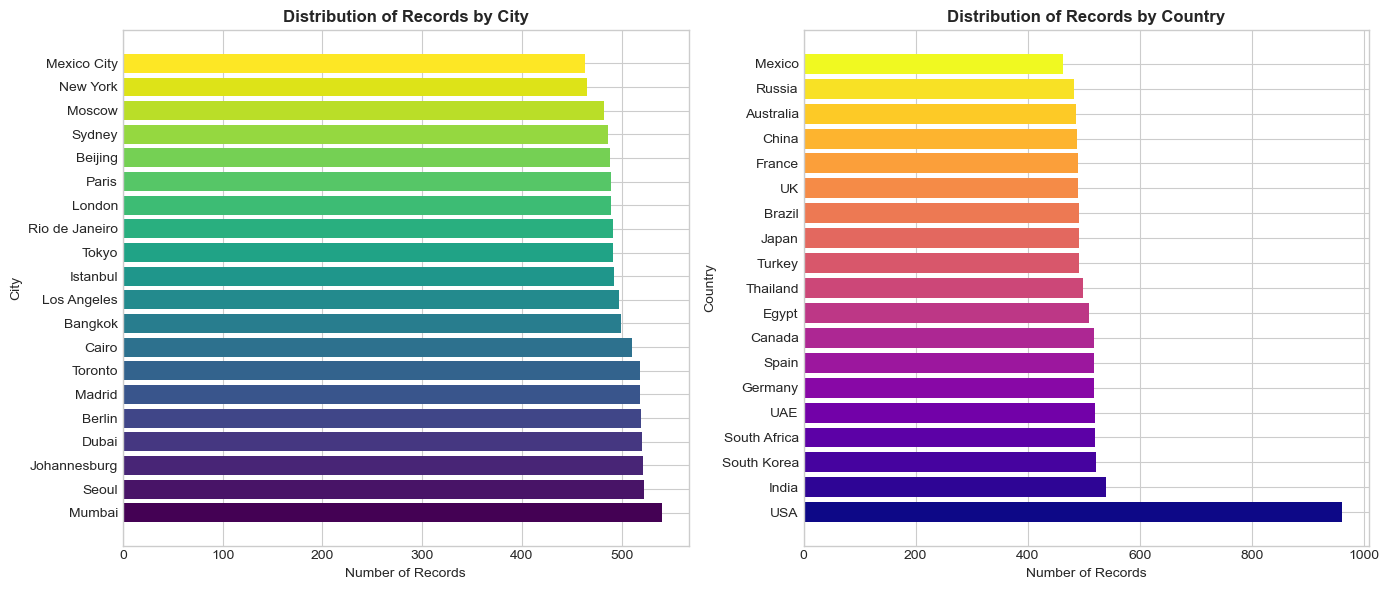


📊 Records per City:
City
Mumbai            540
Seoul             522
Johannesburg      521
Dubai             520
Berlin            519
Madrid            518
Toronto           518
Cairo             510
Bangkok           499
Los Angeles       497
Istanbul          492
Tokyo             491
Rio de Janeiro    491
London            489
Paris             489
Beijing           488
Sydney            486
Moscow            482
New York          465
Mexico City       463
Name: count, dtype: int64

📊 Records per Country:
Country
USA             962
India           540
South Korea     522
South Africa    521
UAE             520
Germany         519
Spain           518
Canada          518
Egypt           510
Thailand        499
Turkey          492
Japan           491
Brazil          491
UK              489
France          489
China           488
Australia       486
Russia          482
Mexico          463
Name: count, dtype: int64


In [21]:
# ============================================================
# UNIVARIATE ANALYSIS - CATEGORICAL VARIABLES
# ============================================================

print("=" * 60)
print("📊 UNIVARIATE ANALYSIS - CATEGORICAL VARIABLES")
print("=" * 60)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# City Distribution
city_counts = df['City'].value_counts()
axes[0].barh(city_counts.index, city_counts.values, color=plt.cm.viridis(np.linspace(0, 1, len(city_counts))))
axes[0].set_title('Distribution of Records by City', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Number of Records')
axes[0].set_ylabel('City')

# Country Distribution  
country_counts = df['Country'].value_counts()
axes[1].barh(country_counts.index, country_counts.values, color=plt.cm.plasma(np.linspace(0, 1, len(country_counts))))
axes[1].set_title('Distribution of Records by Country', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Number of Records')
axes[1].set_ylabel('Country')

plt.tight_layout()
plt.show()

print("\n📊 Records per City:")
print(city_counts)
print("\n📊 Records per Country:")
print(country_counts)

## 2.2 Bivariate Analysis
Analyze relationships between pairs of variables using scatter plots and comparative visualizations.

📊 BIVARIATE ANALYSIS - POLLUTANTS VS WEATHER CONDITIONS


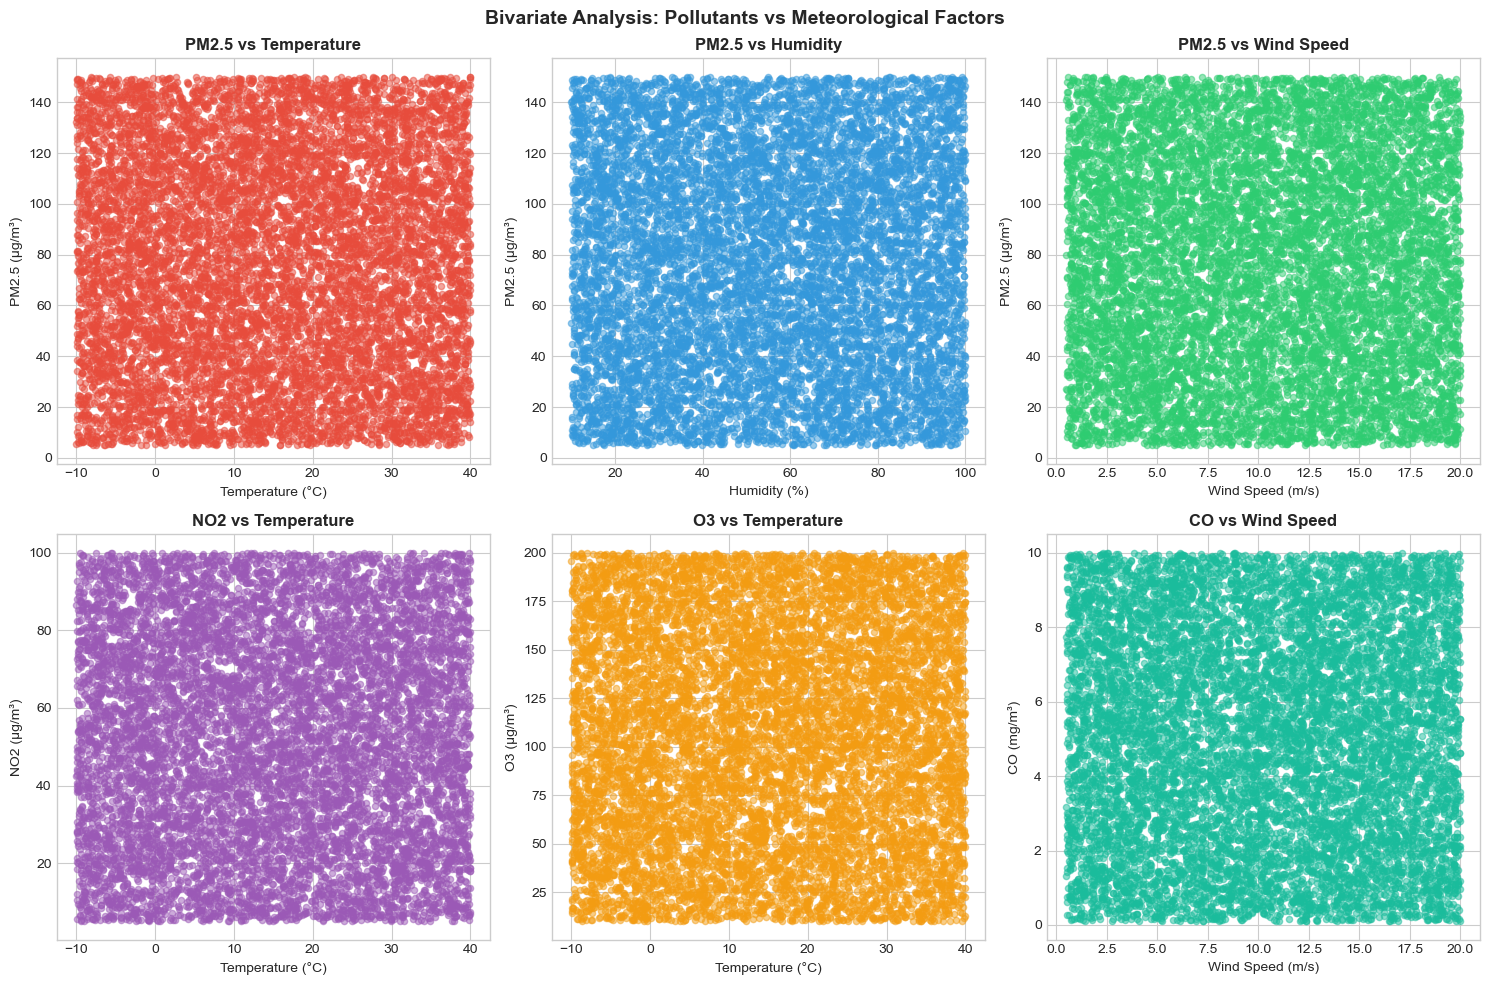

In [22]:
# ============================================================
# BIVARIATE ANALYSIS - POLLUTANTS VS METEOROLOGICAL FACTORS
# ============================================================

print("=" * 60)
print("📊 BIVARIATE ANALYSIS - POLLUTANTS VS WEATHER CONDITIONS")
print("=" * 60)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# PM2.5 vs Temperature
axes[0, 0].scatter(df['Temperature'], df['PM2.5'], alpha=0.5, c='#e74c3c', s=20)
axes[0, 0].set_xlabel('Temperature (°C)')
axes[0, 0].set_ylabel('PM2.5 (μg/m³)')
axes[0, 0].set_title('PM2.5 vs Temperature', fontweight='bold')

# PM2.5 vs Humidity
axes[0, 1].scatter(df['Humidity'], df['PM2.5'], alpha=0.5, c='#3498db', s=20)
axes[0, 1].set_xlabel('Humidity (%)')
axes[0, 1].set_ylabel('PM2.5 (μg/m³)')
axes[0, 1].set_title('PM2.5 vs Humidity', fontweight='bold')

# PM2.5 vs Wind Speed
axes[0, 2].scatter(df['Wind Speed'], df['PM2.5'], alpha=0.5, c='#2ecc71', s=20)
axes[0, 2].set_xlabel('Wind Speed (m/s)')
axes[0, 2].set_ylabel('PM2.5 (μg/m³)')
axes[0, 2].set_title('PM2.5 vs Wind Speed', fontweight='bold')

# NO2 vs Temperature
axes[1, 0].scatter(df['Temperature'], df['NO2'], alpha=0.5, c='#9b59b6', s=20)
axes[1, 0].set_xlabel('Temperature (°C)')
axes[1, 0].set_ylabel('NO2 (μg/m³)')
axes[1, 0].set_title('NO2 vs Temperature', fontweight='bold')

# O3 vs Temperature
axes[1, 1].scatter(df['Temperature'], df['O3'], alpha=0.5, c='#f39c12', s=20)
axes[1, 1].set_xlabel('Temperature (°C)')
axes[1, 1].set_ylabel('O3 (μg/m³)')
axes[1, 1].set_title('O3 vs Temperature', fontweight='bold')

# CO vs Wind Speed
axes[1, 2].scatter(df['Wind Speed'], df['CO'], alpha=0.5, c='#1abc9c', s=20)
axes[1, 2].set_xlabel('Wind Speed (m/s)')
axes[1, 2].set_ylabel('CO (mg/m³)')
axes[1, 2].set_title('CO vs Wind Speed', fontweight='bold')

plt.suptitle('Bivariate Analysis: Pollutants vs Meteorological Factors', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

📊 BIVARIATE ANALYSIS - POLLUTANT PAIR PLOTS


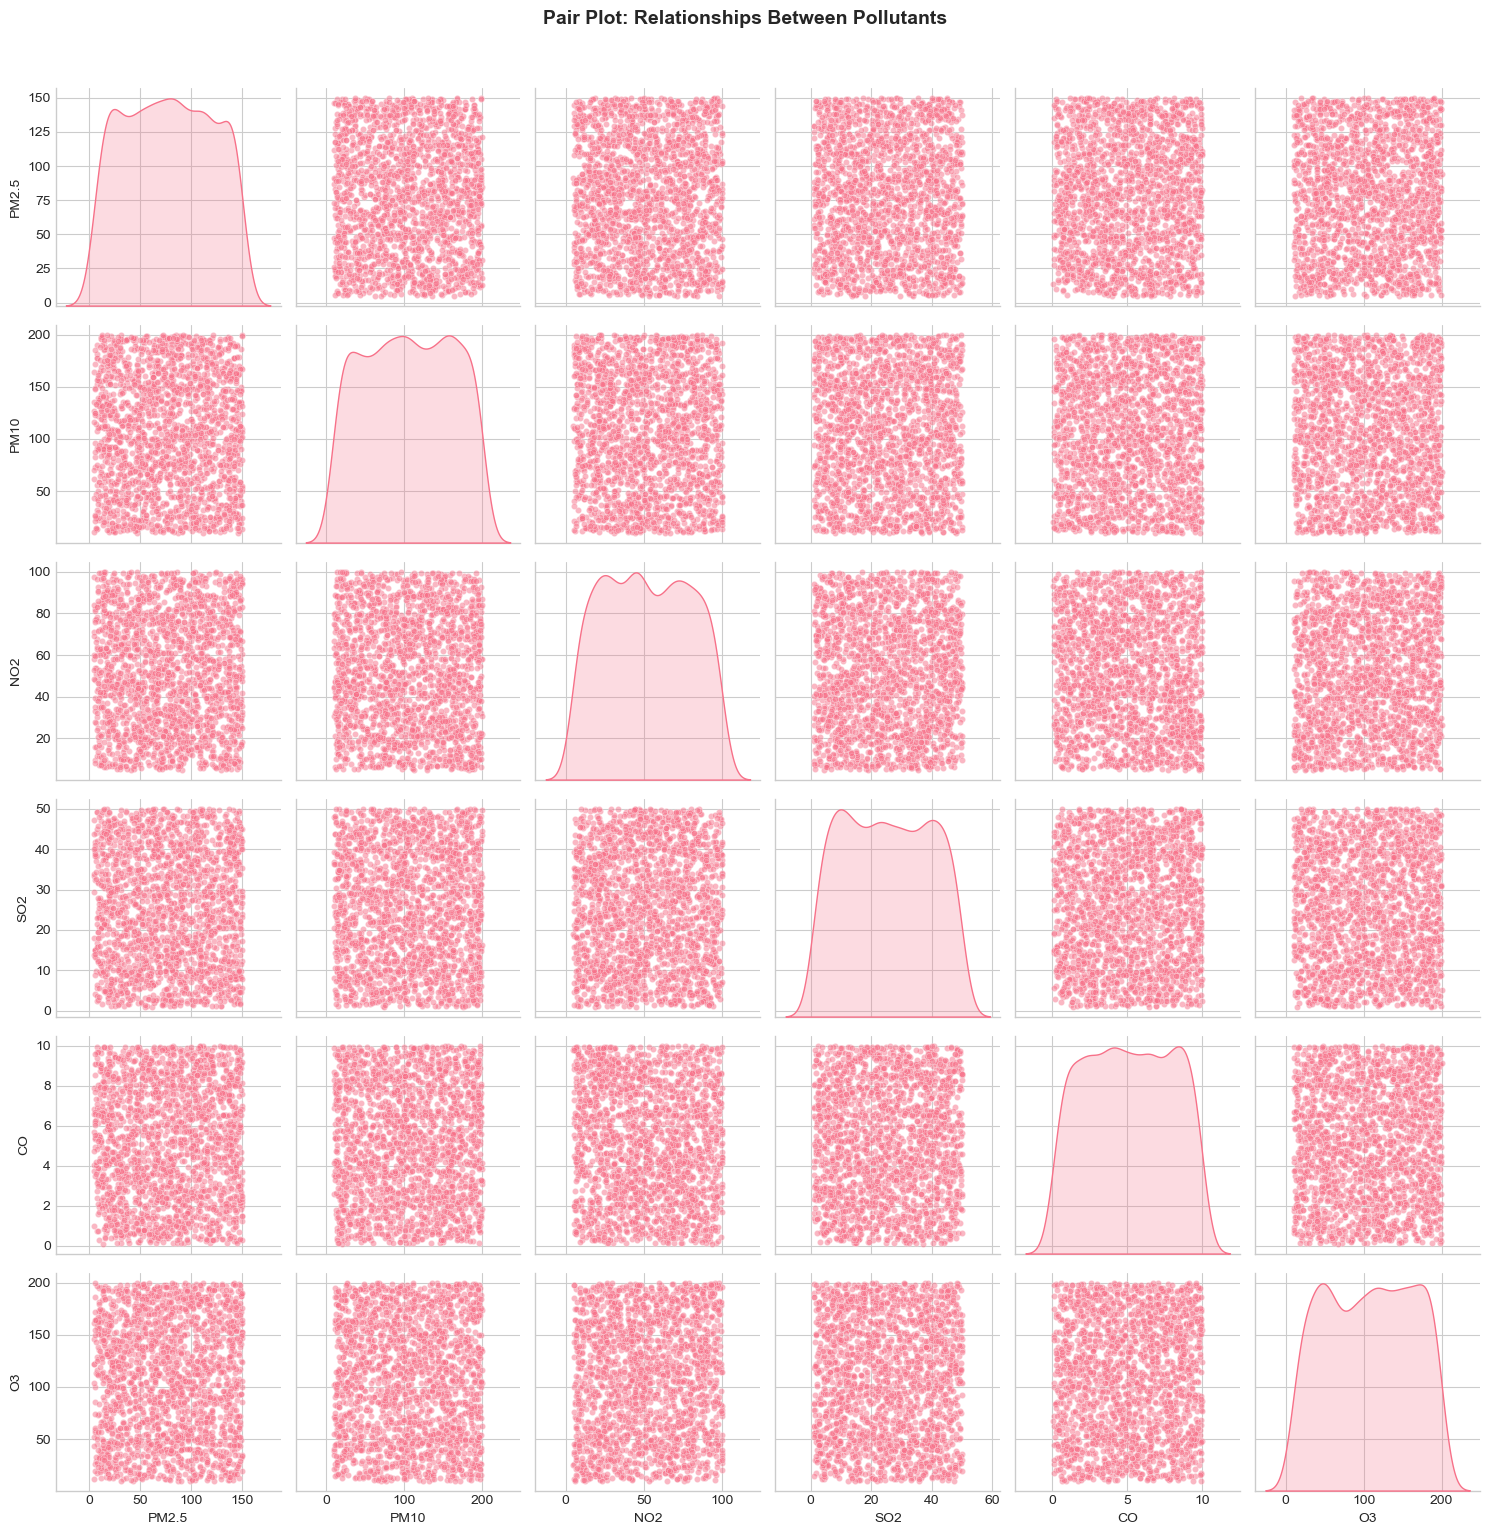

In [23]:
# ============================================================
# BIVARIATE ANALYSIS - POLLUTANT RELATIONSHIPS (PAIRPLOT)
# ============================================================

print("=" * 60)
print("📊 BIVARIATE ANALYSIS - POLLUTANT PAIR PLOTS")
print("=" * 60)

# Pair plot for pollutants
pollutant_subset = df[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']].sample(min(2000, len(df)), random_state=42)
sns.pairplot(pollutant_subset, diag_kind='kde', plot_kws={'alpha': 0.5, 's': 20})
plt.suptitle('Pair Plot: Relationships Between Pollutants', y=1.02, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

📊 BIVARIATE ANALYSIS - POLLUTANTS BY AQI CATEGORY


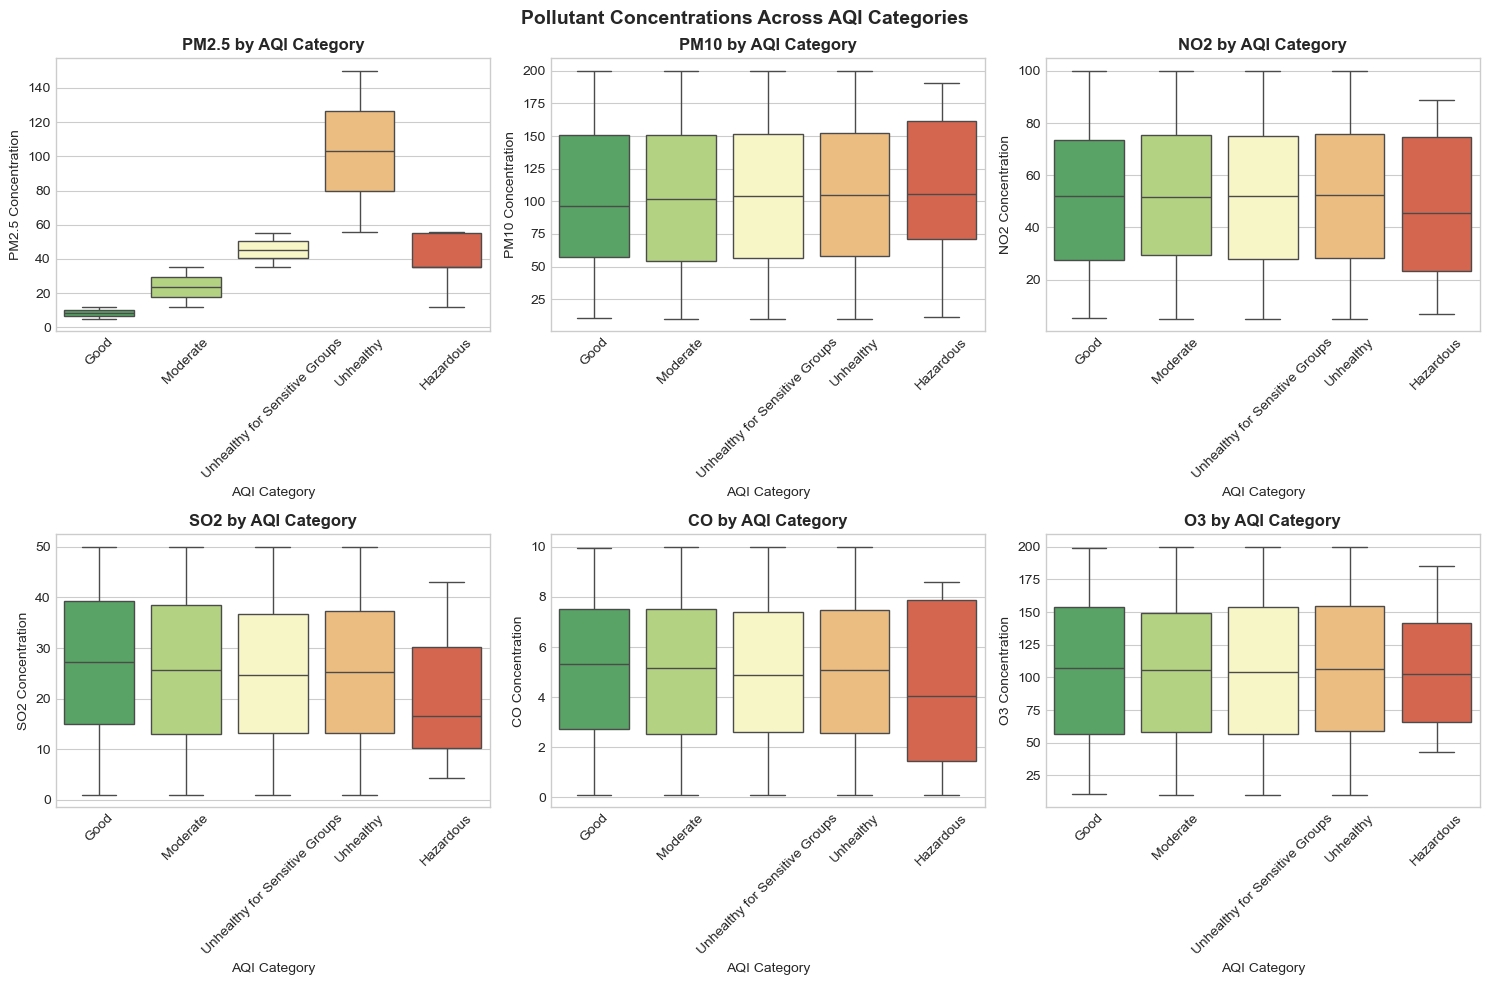

In [24]:
# ============================================================
# BIVARIATE ANALYSIS - POLLUTANTS BY AQI CATEGORY
# ============================================================

print("=" * 60)
print("📊 BIVARIATE ANALYSIS - POLLUTANTS BY AQI CATEGORY")
print("=" * 60)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

category_order = ['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous']
existing_categories = [cat for cat in category_order if cat in df['AQI_Category'].unique()]

for idx, col in enumerate(pollutant_cols):
    sns.boxplot(data=df, x='AQI_Category', y=col, ax=axes[idx], 
                order=existing_categories, palette='RdYlGn_r')
    axes[idx].set_title(f'{col} by AQI Category', fontweight='bold')
    axes[idx].set_xlabel('AQI Category')
    axes[idx].set_ylabel(f'{col} Concentration')
    axes[idx].tick_params(axis='x', rotation=45)

plt.suptitle('Pollutant Concentrations Across AQI Categories', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 2.3 Correlation Analysis
Analyze correlations between variables using Pearson correlation coefficient and heatmap visualization.

📊 CORRELATION ANALYSIS

📊 Correlation Matrix:
             PM2.5  PM10   NO2   SO2    CO    O3  Temperature  Humidity  \
PM2.5         1.00  0.01  0.01 -0.01  0.01  0.01        -0.01     -0.00   
PM10          0.01  1.00  0.01 -0.00  0.01 -0.00        -0.00      0.01   
NO2           0.01  0.01  1.00 -0.00 -0.00  0.02        -0.01      0.00   
SO2          -0.01 -0.00 -0.00  1.00  0.02  0.00        -0.00      0.00   
CO            0.01  0.01 -0.00  0.02  1.00  0.01        -0.01      0.01   
O3            0.01 -0.00  0.02  0.00  0.01  1.00         0.01      0.01   
Temperature  -0.01 -0.00 -0.01 -0.00 -0.01  0.01         1.00     -0.01   
Humidity     -0.00  0.01  0.00  0.00  0.01  0.01        -0.01      1.00   
Wind Speed   -0.00  0.01  0.01  0.01 -0.01 -0.01        -0.01     -0.01   
AQI           0.88  0.01  0.00 -0.02 -0.00  0.01        -0.01      0.00   

             Wind Speed   AQI  
PM2.5             -0.00  0.88  
PM10               0.01  0.01  
NO2                0.01  0.00  


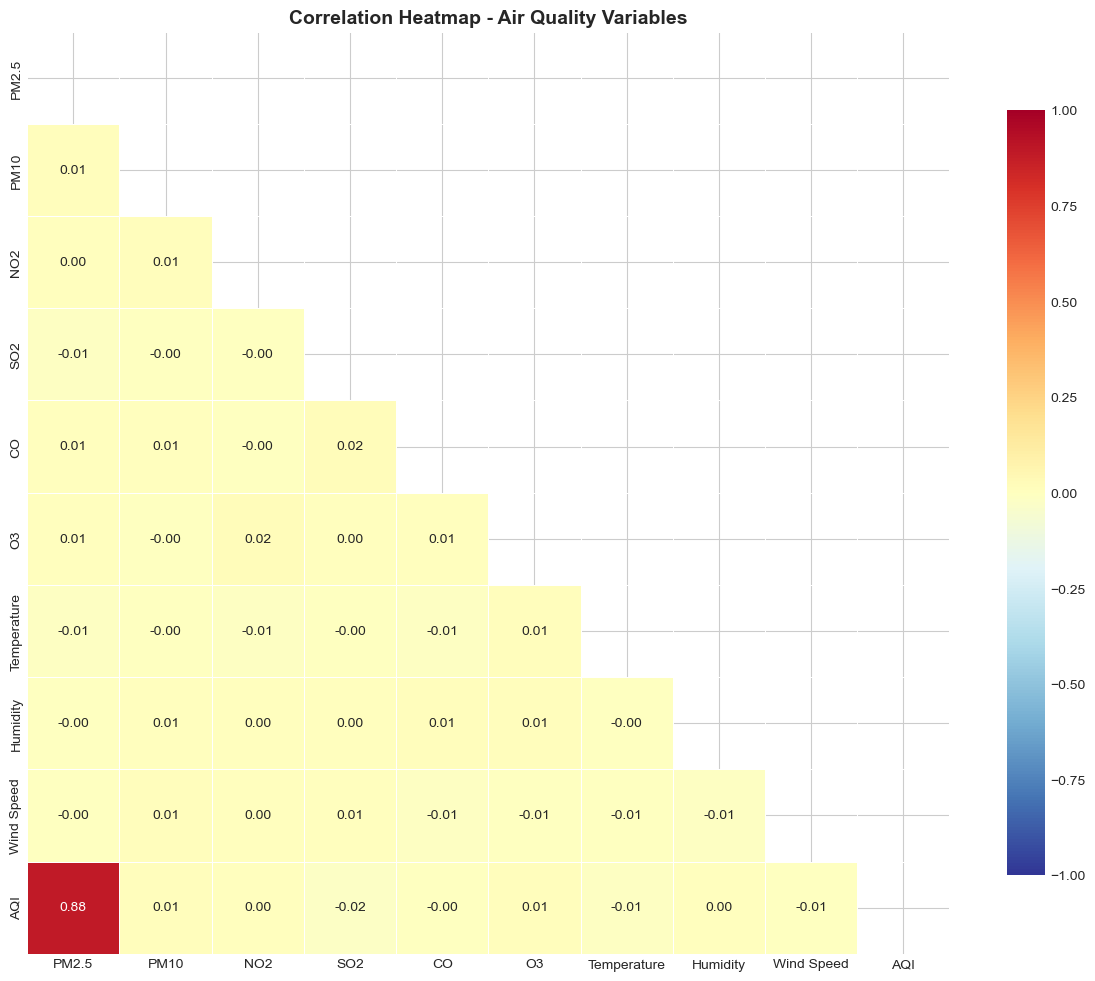

In [25]:
# ============================================================
# CORRELATION MATRIX AND HEATMAP
# ============================================================

print("=" * 60)
print("📊 CORRELATION ANALYSIS")
print("=" * 60)

# Calculate correlation matrix
correlation_cols = numerical_cols + ['AQI']
correlation_matrix = df[correlation_cols].corr()

print("\n📊 Correlation Matrix:")
print(correlation_matrix.round(3))

# Create heatmap
fig, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', 
            cmap='RdYlBu_r', center=0, square=True, linewidths=0.5,
            vmin=-1, vmax=1, cbar_kws={'shrink': 0.8})

plt.title('Correlation Heatmap - Air Quality Variables', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [26]:
# ============================================================
# IDENTIFY STRONG CORRELATIONS
# ============================================================

print("=" * 60)
print("📊 STRONG CORRELATIONS (|r| > 0.5)")
print("=" * 60)

# Find strong correlations
strong_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.5:
            var1 = correlation_matrix.columns[i]
            var2 = correlation_matrix.columns[j]
            correlation_type = "Positive" if corr_value > 0 else "Negative"
            strong_correlations.append({
                'Variable 1': var1,
                'Variable 2': var2,
                'Correlation': round(corr_value, 3),
                'Type': correlation_type,
                'Strength': 'Strong' if abs(corr_value) > 0.7 else 'Moderate'
            })

if strong_correlations:
    strong_corr_df = pd.DataFrame(strong_correlations)
    strong_corr_df = strong_corr_df.sort_values('Correlation', key=abs, ascending=False)
    print(strong_corr_df.to_string(index=False))
else:
    print("No strong correlations (|r| > 0.5) found.")

# Correlation with AQI
print("\n" + "=" * 60)
print("📊 CORRELATION WITH AQI (Target Variable)")
print("=" * 60)
aqi_correlations = correlation_matrix['AQI'].drop('AQI').sort_values(key=abs, ascending=False)
for var, corr in aqi_correlations.items():
    print(f"  • {var}: {corr:.3f}")

📊 STRONG CORRELATIONS (|r| > 0.5)
Variable 1 Variable 2  Correlation     Type Strength
     PM2.5        AQI         0.88 Positive   Strong

📊 CORRELATION WITH AQI (Target Variable)
  • PM2.5: 0.883
  • SO2: -0.022
  • Temperature: -0.013
  • PM10: 0.013
  • O3: 0.009
  • Wind Speed: -0.005
  • CO: -0.004
  • Humidity: 0.003
  • NO2: 0.001


## 2.4 Comparative Analysis
Compare air quality metrics across different cities and countries.

📊 COMPARATIVE ANALYSIS - POLLUTANT LEVELS BY CITY

📊 Mean AQI by City (Ranked):
City
Mexico City      147.73
Tokyo            147.64
Johannesburg     147.62
Mumbai           147.51
New York         147.50
Dubai            147.40
Toronto          147.27
Sydney           146.86
London           146.77
Beijing          146.48
Moscow           146.34
Cairo            146.33
Berlin           145.65
Bangkok          145.43
Istanbul         145.16
Rio de Janeiro   144.86
Paris            144.13
Madrid           143.89
Los Angeles      143.63
Seoul            142.83
Name: AQI, dtype: float64


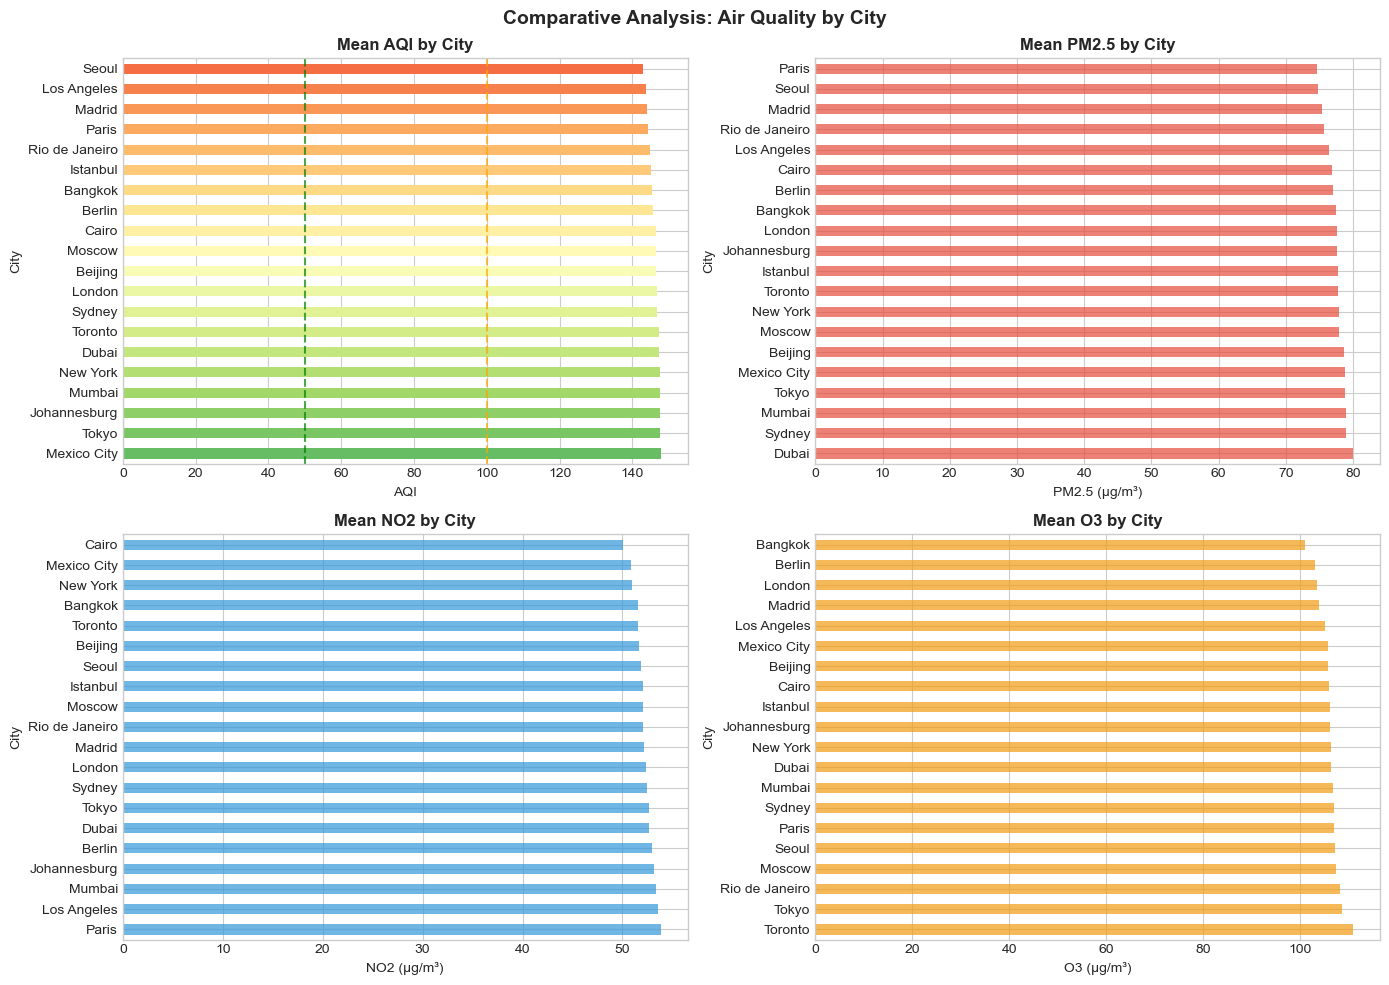

In [27]:
# ============================================================
# COMPARATIVE ANALYSIS - MEAN POLLUTANT LEVELS BY CITY
# ============================================================

print("=" * 60)
print("📊 COMPARATIVE ANALYSIS - POLLUTANT LEVELS BY CITY")
print("=" * 60)

# Calculate mean pollutant levels by city
city_pollution = df.groupby('City')[pollutant_cols].mean().round(2)
city_aqi = df.groupby('City')['AQI'].mean().round(2).sort_values(ascending=False)

print("\n📊 Mean AQI by City (Ranked):")
print(city_aqi)

# Visualize city-wise comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Mean AQI by City
city_aqi.plot(kind='barh', ax=axes[0, 0], color=plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(city_aqi))))
axes[0, 0].set_title('Mean AQI by City', fontweight='bold')
axes[0, 0].set_xlabel('AQI')
axes[0, 0].axvline(x=50, color='green', linestyle='--', alpha=0.7, label='Good (50)')
axes[0, 0].axvline(x=100, color='orange', linestyle='--', alpha=0.7, label='Moderate (100)')

# Mean PM2.5 by City
city_pm25 = df.groupby('City')['PM2.5'].mean().sort_values(ascending=False)
city_pm25.plot(kind='barh', ax=axes[0, 1], color='#e74c3c', alpha=0.7)
axes[0, 1].set_title('Mean PM2.5 by City', fontweight='bold')
axes[0, 1].set_xlabel('PM2.5 (μg/m³)')

# Mean NO2 by City
city_no2 = df.groupby('City')['NO2'].mean().sort_values(ascending=False)
city_no2.plot(kind='barh', ax=axes[1, 0], color='#3498db', alpha=0.7)
axes[1, 0].set_title('Mean NO2 by City', fontweight='bold')
axes[1, 0].set_xlabel('NO2 (μg/m³)')

# Mean O3 by City
city_o3 = df.groupby('City')['O3'].mean().sort_values(ascending=False)
city_o3.plot(kind='barh', ax=axes[1, 1], color='#f39c12', alpha=0.7)
axes[1, 1].set_title('Mean O3 by City', fontweight='bold')
axes[1, 1].set_xlabel('O3 (μg/m³)')

plt.suptitle('Comparative Analysis: Air Quality by City', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

📊 COMPARATIVE ANALYSIS - POLLUTANT LEVELS BY COUNTRY

📊 Mean Pollutant Levels by Country:
              PM2.5   PM10   NO2   SO2   CO     O3    AQI
Country                                                  
Mexico        78.86 104.53 50.86 26.02 5.14 105.69 147.73
Japan         78.87 105.04 52.67 27.98 5.10 108.48 147.64
South Africa  77.67 105.14 53.15 24.67 5.09 106.18 147.62
India         78.90 105.84 53.34 25.03 5.08 106.64 147.51
UAE           80.01 103.89 52.68 24.96 5.08 106.40 147.40
Canada        77.83 103.87 51.55 24.80 4.95 110.85 147.27
Australia     78.93 103.37 52.47 25.68 5.02 106.82 146.86
UK            77.61 103.84 52.33 25.50 4.95 103.31 146.77
China         78.63 103.19 51.62 24.90 5.09 105.74 146.48
Russia        77.88 105.94 52.03 26.11 5.12 107.29 146.34
Egypt         76.89 102.99 50.06 24.99 5.13 105.93 146.33
Germany       76.97 104.37 52.96 24.51 4.97 102.93 145.65
USA           77.11 104.29 52.30 25.67 5.12 105.69 145.50
Thailand      77.46 103.93 51.51 25.58 5

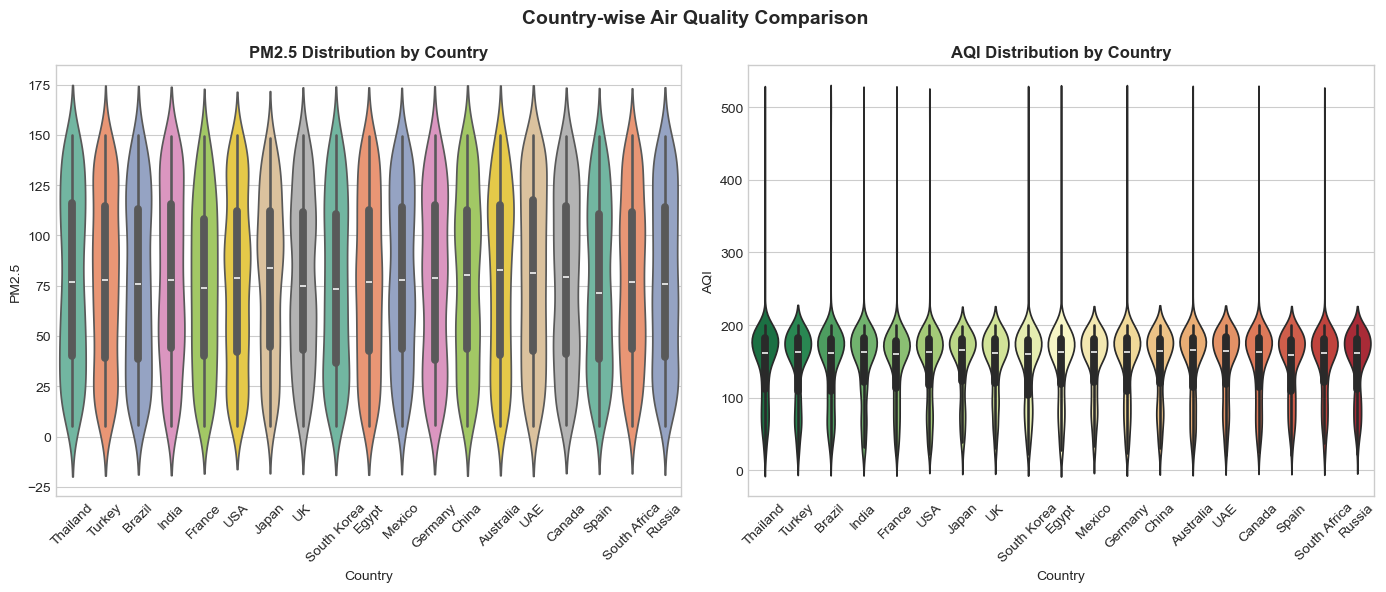

In [28]:
# ============================================================
# COMPARATIVE ANALYSIS - BY COUNTRY
# ============================================================

print("=" * 60)
print("📊 COMPARATIVE ANALYSIS - POLLUTANT LEVELS BY COUNTRY")
print("=" * 60)

# Calculate mean pollutant levels by country
country_pollution = df.groupby('Country')[pollutant_cols + ['AQI']].mean().round(2)
country_pollution = country_pollution.sort_values('AQI', ascending=False)

print("\n📊 Mean Pollutant Levels by Country:")
print(country_pollution)

# Violin plot for PM2.5 by country
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# PM2.5 by Country (Violin Plot)
sns.violinplot(data=df, x='Country', y='PM2.5', ax=axes[0], palette='Set2')
axes[0].set_title('PM2.5 Distribution by Country', fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)

# AQI by Country (Violin Plot)
sns.violinplot(data=df, x='Country', y='AQI', ax=axes[1], palette='RdYlGn_r')
axes[1].set_title('AQI Distribution by Country', fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)

plt.suptitle('Country-wise Air Quality Comparison', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 2.5 Time Series Analysis and Cycle Detection
Analyze temporal patterns and identify seasonal/periodic cycles in air quality data.

In [29]:
# ============================================================
# TIME SERIES ANALYSIS - CONVERT DATE COLUMN
# ============================================================

print("=" * 60)
print("📅 TIME SERIES ANALYSIS")
print("=" * 60)

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract time-based features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek  # 0=Monday, 6=Sunday
df['WeekOfYear'] = df['Date'].dt.isocalendar().week.astype(int)
df['Quarter'] = df['Date'].dt.quarter

# Day names for better visualization
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

print(f"\n📊 Date Range: {df['Date'].min()} to {df['Date'].max()}")
print(f"📊 Years in Dataset: {sorted(df['Year'].unique())}")
print(f"📊 Number of Months: {df['Month'].nunique()}")

📅 TIME SERIES ANALYSIS

📊 Date Range: 2023-01-01 00:00:00 to 2023-12-28 00:00:00
📊 Years in Dataset: [np.int32(2023)]
📊 Number of Months: 12


📊 MONTHLY CYCLE ANALYSIS


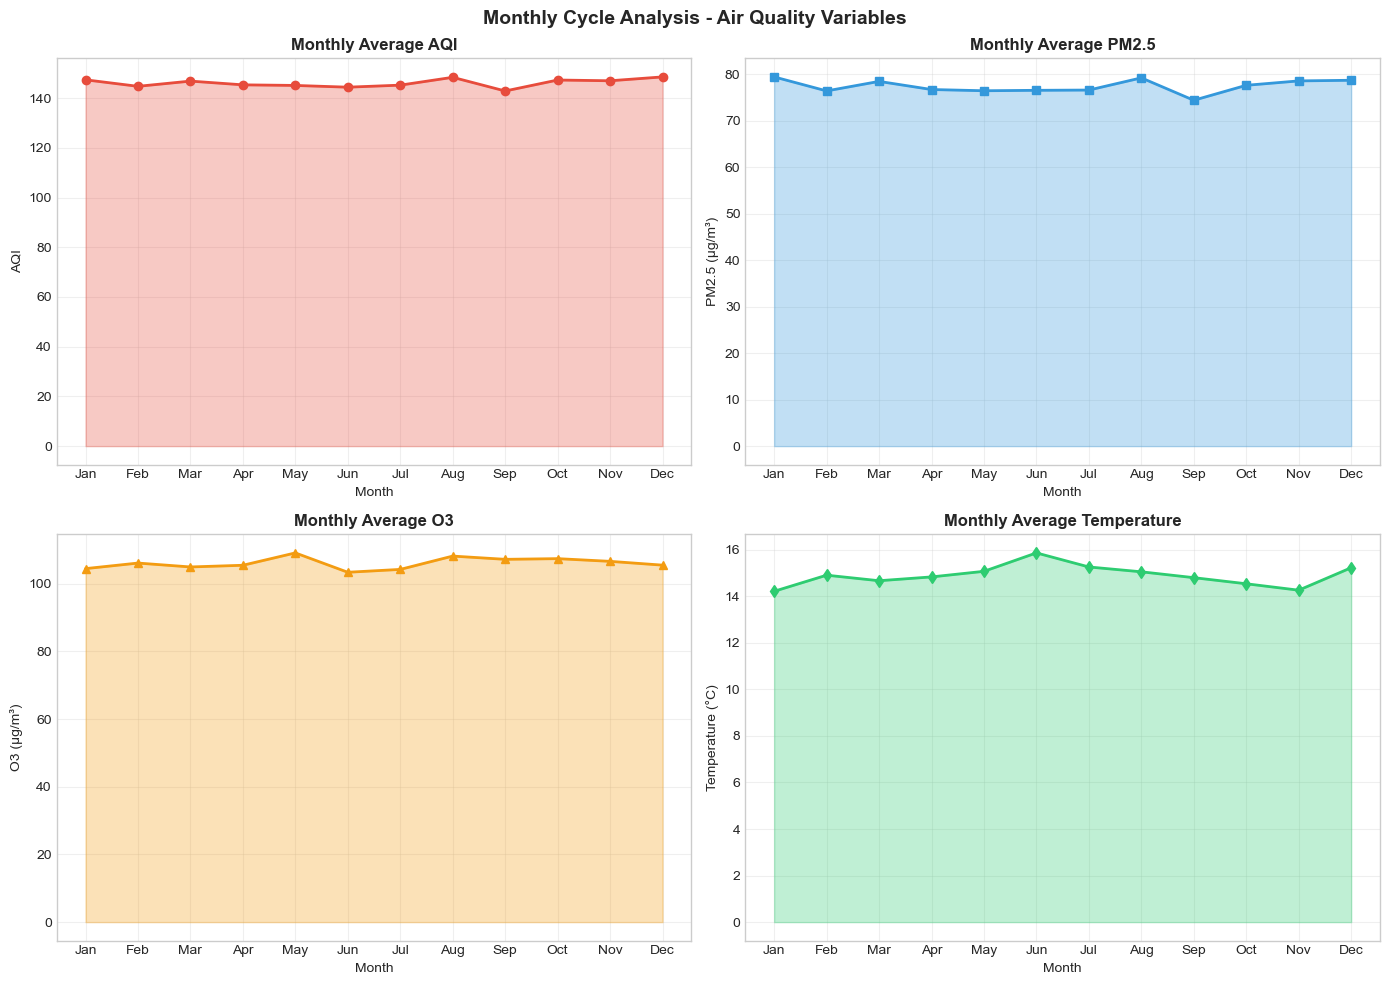

In [30]:
# ============================================================
# MONTHLY CYCLE ANALYSIS
# ============================================================

print("=" * 60)
print("📊 MONTHLY CYCLE ANALYSIS")
print("=" * 60)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Monthly AQI Trend
monthly_aqi = df.groupby('Month')['AQI'].mean()
axes[0, 0].plot(monthly_aqi.index, monthly_aqi.values, marker='o', linewidth=2, color='#e74c3c')
axes[0, 0].fill_between(monthly_aqi.index, monthly_aqi.values, alpha=0.3, color='#e74c3c')
axes[0, 0].set_title('Monthly Average AQI', fontweight='bold')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('AQI')
axes[0, 0].set_xticks(range(1, 13))
axes[0, 0].set_xticklabels(month_names)
axes[0, 0].grid(True, alpha=0.3)

# Monthly PM2.5 Trend
monthly_pm25 = df.groupby('Month')['PM2.5'].mean()
axes[0, 1].plot(monthly_pm25.index, monthly_pm25.values, marker='s', linewidth=2, color='#3498db')
axes[0, 1].fill_between(monthly_pm25.index, monthly_pm25.values, alpha=0.3, color='#3498db')
axes[0, 1].set_title('Monthly Average PM2.5', fontweight='bold')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('PM2.5 (μg/m³)')
axes[0, 1].set_xticks(range(1, 13))
axes[0, 1].set_xticklabels(month_names)
axes[0, 1].grid(True, alpha=0.3)

# Monthly O3 Trend
monthly_o3 = df.groupby('Month')['O3'].mean()
axes[1, 0].plot(monthly_o3.index, monthly_o3.values, marker='^', linewidth=2, color='#f39c12')
axes[1, 0].fill_between(monthly_o3.index, monthly_o3.values, alpha=0.3, color='#f39c12')
axes[1, 0].set_title('Monthly Average O3', fontweight='bold')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('O3 (μg/m³)')
axes[1, 0].set_xticks(range(1, 13))
axes[1, 0].set_xticklabels(month_names)
axes[1, 0].grid(True, alpha=0.3)

# Monthly Temperature Trend
monthly_temp = df.groupby('Month')['Temperature'].mean()
axes[1, 1].plot(monthly_temp.index, monthly_temp.values, marker='d', linewidth=2, color='#2ecc71')
axes[1, 1].fill_between(monthly_temp.index, monthly_temp.values, alpha=0.3, color='#2ecc71')
axes[1, 1].set_title('Monthly Average Temperature', fontweight='bold')
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Temperature (°C)')
axes[1, 1].set_xticks(range(1, 13))
axes[1, 1].set_xticklabels(month_names)
axes[1, 1].grid(True, alpha=0.3)

plt.suptitle('Monthly Cycle Analysis - Air Quality Variables', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

📊 WEEKLY CYCLE ANALYSIS (DAY OF WEEK)


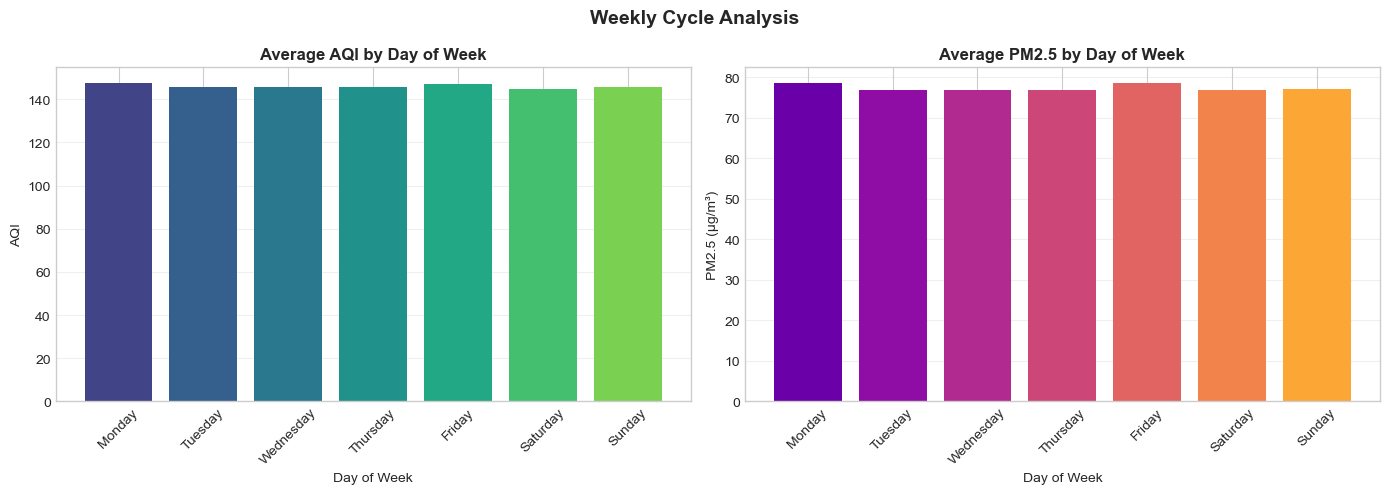


📊 Observations:
  • Highest AQI Day: Monday (AQI: 147.45)
  • Lowest AQI Day: Saturday (AQI: 144.92)


In [31]:
# ============================================================
# WEEKLY CYCLE ANALYSIS (DAY OF WEEK)
# ============================================================

print("=" * 60)
print("📊 WEEKLY CYCLE ANALYSIS (DAY OF WEEK)")
print("=" * 60)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Daily AQI by Day of Week
daily_aqi = df.groupby('DayOfWeek')['AQI'].mean()
bars1 = axes[0].bar(daily_aqi.index, daily_aqi.values, color=plt.cm.viridis(np.linspace(0.2, 0.8, 7)))
axes[0].set_title('Average AQI by Day of Week', fontweight='bold')
axes[0].set_xlabel('Day of Week')
axes[0].set_ylabel('AQI')
axes[0].set_xticks(range(7))
axes[0].set_xticklabels(day_names, rotation=45)
axes[0].grid(True, alpha=0.3, axis='y')

# PM2.5 by Day of Week
daily_pm25 = df.groupby('DayOfWeek')['PM2.5'].mean()
bars2 = axes[1].bar(daily_pm25.index, daily_pm25.values, color=plt.cm.plasma(np.linspace(0.2, 0.8, 7)))
axes[1].set_title('Average PM2.5 by Day of Week', fontweight='bold')
axes[1].set_xlabel('Day of Week')
axes[1].set_ylabel('PM2.5 (μg/m³)')
axes[1].set_xticks(range(7))
axes[1].set_xticklabels(day_names, rotation=45)
axes[1].grid(True, alpha=0.3, axis='y')

plt.suptitle('Weekly Cycle Analysis', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Print observations
print("\n📊 Observations:")
print(f"  • Highest AQI Day: {day_names[daily_aqi.idxmax()]} (AQI: {daily_aqi.max():.2f})")
print(f"  • Lowest AQI Day: {day_names[daily_aqi.idxmin()]} (AQI: {daily_aqi.min():.2f})")

📊 SEASONAL CYCLE ANALYSIS

📊 Seasonal Average Pollutant Levels:
        PM2.5   PM10   NO2   SO2   CO     O3    AQI
Season                                             
Winter  78.12 104.61 52.00 25.08 5.04 105.19 146.28
Spring  76.61 102.82 52.61 25.64 5.07 105.93 144.93
Summer  76.76 106.02 52.14 25.30 5.05 106.51 145.44
Fall    78.34 104.33 52.04 25.36 5.02 106.50 147.58


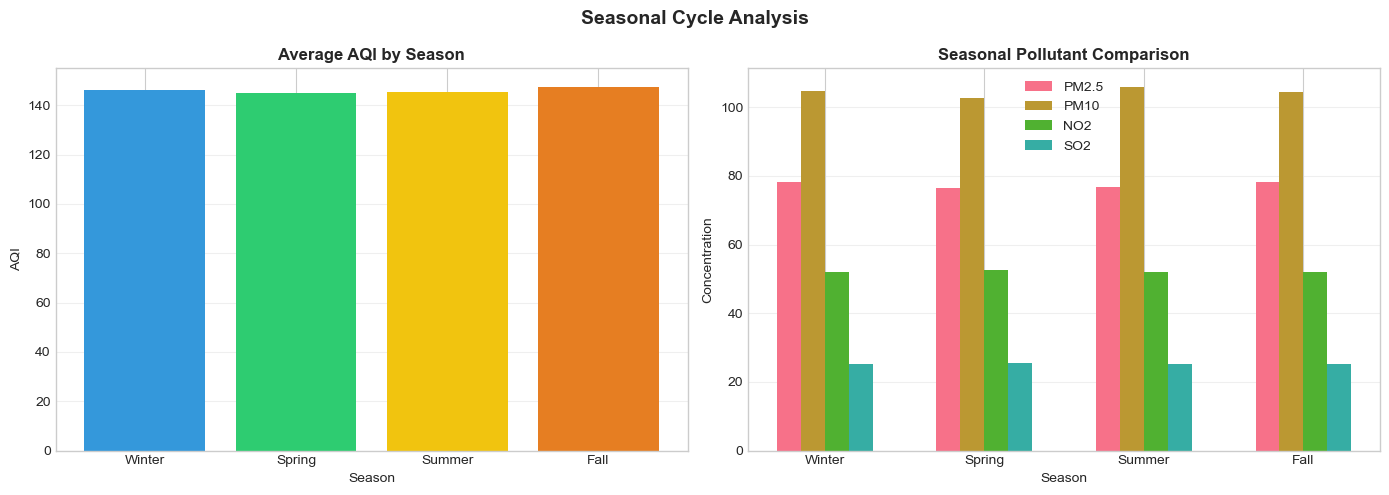

In [32]:
# ============================================================
# SEASONAL CYCLE ANALYSIS (QUARTERLY)
# ============================================================

print("=" * 60)
print("📊 SEASONAL CYCLE ANALYSIS")
print("=" * 60)

# Create season labels
season_map = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
df['Season'] = df['Quarter'].map(season_map)

# Seasonal analysis
seasonal_stats = df.groupby('Season')[pollutant_cols + ['AQI']].mean()
seasonal_stats = seasonal_stats.reindex(['Winter', 'Spring', 'Summer', 'Fall'])

print("\n📊 Seasonal Average Pollutant Levels:")
print(seasonal_stats.round(2))

# Visualize seasonal patterns
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Seasonal AQI
seasons = ['Winter', 'Spring', 'Summer', 'Fall']
season_colors = ['#3498db', '#2ecc71', '#f1c40f', '#e67e22']
seasonal_aqi = df.groupby('Season')['AQI'].mean().reindex(seasons)
axes[0].bar(seasons, seasonal_aqi.values, color=season_colors)
axes[0].set_title('Average AQI by Season', fontweight='bold')
axes[0].set_xlabel('Season')
axes[0].set_ylabel('AQI')
axes[0].grid(True, alpha=0.3, axis='y')

# Seasonal pollutant comparison
x = np.arange(len(seasons))
width = 0.15
for i, col in enumerate(pollutant_cols[:4]):
    values = df.groupby('Season')[col].mean().reindex(seasons)
    axes[1].bar(x + i*width, values, width, label=col)
axes[1].set_title('Seasonal Pollutant Comparison', fontweight='bold')
axes[1].set_xlabel('Season')
axes[1].set_ylabel('Concentration')
axes[1].set_xticks(x + width * 1.5)
axes[1].set_xticklabels(seasons)
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

plt.suptitle('Seasonal Cycle Analysis', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

---
# 🤖 PART 3: MODEL BUILDING & PREDICTION
---

We will implement **5 Machine Learning Models** for AQI Classification:
1. **Logistic Regression** - Baseline linear model
2. **Decision Tree Classifier** - Interpretable tree-based model
3. **Random Forest Classifier** - Ensemble of decision trees
4. **Support Vector Machine (SVM)** - Kernel-based classifier
5. **K-Nearest Neighbors (KNN)** - Instance-based learning

Additionally, we'll implement **Linear Regression** for AQI value prediction.

In [33]:
# ============================================================
# PREPARE DATA FOR MODELING
# ============================================================

print("=" * 60)
print("🤖 MODEL BUILDING - DATA PREPARATION")
print("=" * 60)

# Store model results
model_results = []

# Function to evaluate classification model
def evaluate_classification_model(name, model, X_train, X_test, y_train, y_test):
    """
    Train and evaluate a classification model.
    Returns evaluation metrics.
    """
    # Train model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    # Cross-validation score
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    
    return {
        'Model': name,
        'Training Accuracy': accuracy_score(y_train, y_pred_train),
        'Test Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'CV Mean': cv_scores.mean(),
        'CV Std': cv_scores.std()
    }, y_pred, model

print("✅ Helper functions defined!")
print(f"📊 Training samples: {len(X_train_scaled)}")
print(f"📊 Test samples: {len(X_test_scaled)}")

🤖 MODEL BUILDING - DATA PREPARATION
✅ Helper functions defined!
📊 Training samples: 8000
📊 Test samples: 2000


## 3.1 Model 1: Logistic Regression
A fundamental linear classification algorithm that predicts probabilities using the logistic function.

🔷 MODEL 1: LOGISTIC REGRESSION

📊 Model Performance:
  • Training Accuracy: 0.9949
  • Test Accuracy: 0.9940
  • Precision: 0.9925
  • Recall: 0.9940
  • F1-Score: 0.9933
  • CV Mean: 0.9928
  • CV Std: 0.0017

📊 Confusion Matrix:
[[  96    3    0    0]
 [   0  319    3    0]
 [   0    3 1573    0]
 [   0    0    3    0]]


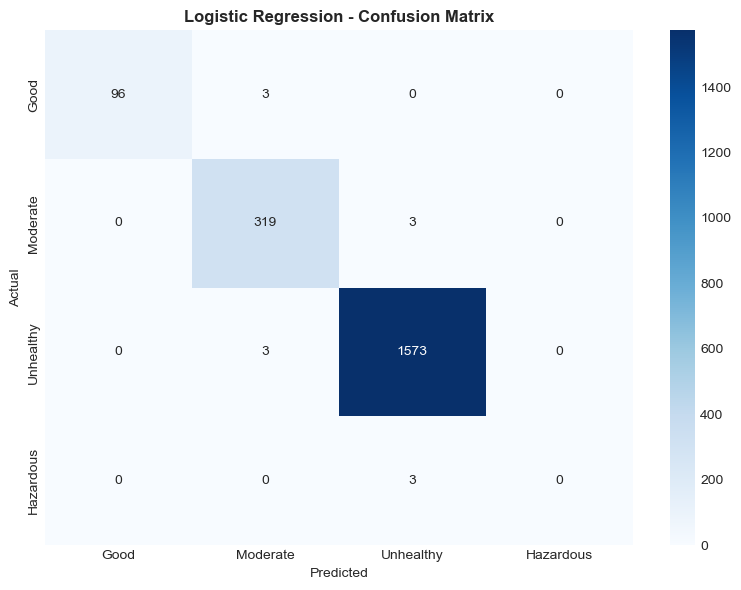


📊 Classification Report:
              precision    recall  f1-score   support

        Good       1.00      0.97      0.98        99
    Moderate       0.98      0.99      0.99       322
   Unhealthy       1.00      1.00      1.00      1576
   Hazardous       0.00      0.00      0.00         3

    accuracy                           0.99      2000
   macro avg       0.74      0.74      0.74      2000
weighted avg       0.99      0.99      0.99      2000



In [34]:
# ============================================================
# MODEL 1: LOGISTIC REGRESSION
# ============================================================

print("=" * 60)
print("🔷 MODEL 1: LOGISTIC REGRESSION")
print("=" * 60)

# Initialize and train model
lr_model = LogisticRegression(max_iter=1000, random_state=42, multi_class='multinomial')

# Evaluate model
lr_results, lr_pred, lr_trained = evaluate_classification_model(
    'Logistic Regression', lr_model, X_train_scaled, X_test_scaled, y_train_clf, y_test_clf
)
model_results.append(lr_results)

# Print results
print("\n📊 Model Performance:")
for metric, value in lr_results.items():
    if metric != 'Model':
        print(f"  • {metric}: {value:.4f}")

# Confusion Matrix
print("\n📊 Confusion Matrix:")
cm_lr = confusion_matrix(y_test_clf, lr_pred)
print(cm_lr)

# Visualize Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', 
            xticklabels=list(label_mapping.values()),
            yticklabels=list(label_mapping.values()))
plt.title('Logistic Regression - Confusion Matrix', fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Classification Report
print("\n📊 Classification Report:")
print(classification_report(y_test_clf, lr_pred, target_names=list(label_mapping.values()), zero_division=0))

## 3.2 Model 2: Decision Tree Classifier
A tree-based model that makes decisions based on feature thresholds, highly interpretable.

🌳 MODEL 2: DECISION TREE CLASSIFIER

📊 Model Performance:
  • Training Accuracy: 0.9999
  • Test Accuracy: 1.0000
  • Precision: 1.0000
  • Recall: 1.0000
  • F1-Score: 1.0000
  • CV Mean: 0.9989
  • CV Std: 0.0007

📊 Confusion Matrix:
[[  99    0    0    0]
 [   0  322    0    0]
 [   0    0 1576    0]
 [   0    0    0    3]]


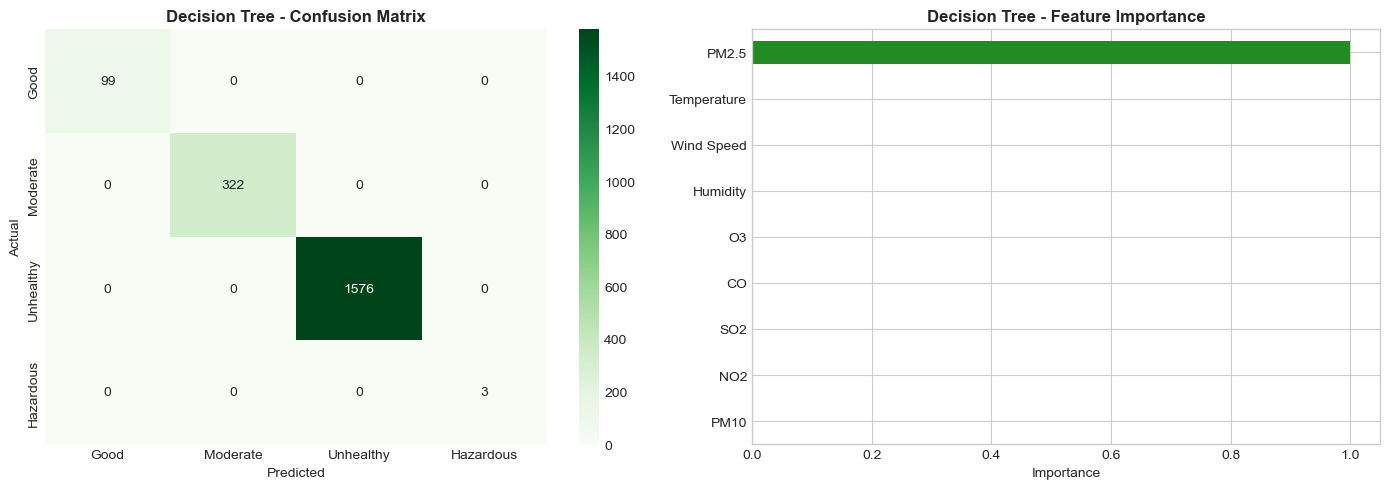


📊 Classification Report:
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00        99
    Moderate       1.00      1.00      1.00       322
   Unhealthy       1.00      1.00      1.00      1576
   Hazardous       1.00      1.00      1.00         3

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [35]:
# ============================================================
# MODEL 2: DECISION TREE CLASSIFIER
# ============================================================

print("=" * 60)
print("🌳 MODEL 2: DECISION TREE CLASSIFIER")
print("=" * 60)

# Initialize and train model
dt_model = DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=42)

# Evaluate model
dt_results, dt_pred, dt_trained = evaluate_classification_model(
    'Decision Tree', dt_model, X_train_scaled, X_test_scaled, y_train_clf, y_test_clf
)
model_results.append(dt_results)

# Print results
print("\n📊 Model Performance:")
for metric, value in dt_results.items():
    if metric != 'Model':
        print(f"  • {metric}: {value:.4f}")

# Confusion Matrix
print("\n📊 Confusion Matrix:")
cm_dt = confusion_matrix(y_test_clf, dt_pred)
print(cm_dt)

# Visualize Confusion Matrix
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion Matrix Heatmap
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens', ax=axes[0],
            xticklabels=list(label_mapping.values()),
            yticklabels=list(label_mapping.values()))
axes[0].set_title('Decision Tree - Confusion Matrix', fontweight='bold')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Feature Importance
feature_importance = pd.Series(dt_trained.feature_importances_, index=feature_columns)
feature_importance = feature_importance.sort_values(ascending=True)
feature_importance.plot(kind='barh', ax=axes[1], color='forestgreen')
axes[1].set_title('Decision Tree - Feature Importance', fontweight='bold')
axes[1].set_xlabel('Importance')

plt.tight_layout()
plt.show()

# Classification Report
print("\n📊 Classification Report:")
print(classification_report(y_test_clf, dt_pred, target_names=list(label_mapping.values()), zero_division=0))

## 3.3 Model 3: Random Forest Classifier
An ensemble method that combines multiple decision trees to improve accuracy and reduce overfitting.

🌲 MODEL 3: RANDOM FOREST CLASSIFIER

📊 Model Performance:
  • Training Accuracy: 1.0000
  • Test Accuracy: 0.9985
  • Precision: 0.9970
  • Recall: 0.9985
  • F1-Score: 0.9978
  • CV Mean: 0.9983
  • CV Std: 0.0005

📊 Confusion Matrix:
[[  99    0    0    0]
 [   0  322    0    0]
 [   0    0 1576    0]
 [   0    2    1    0]]


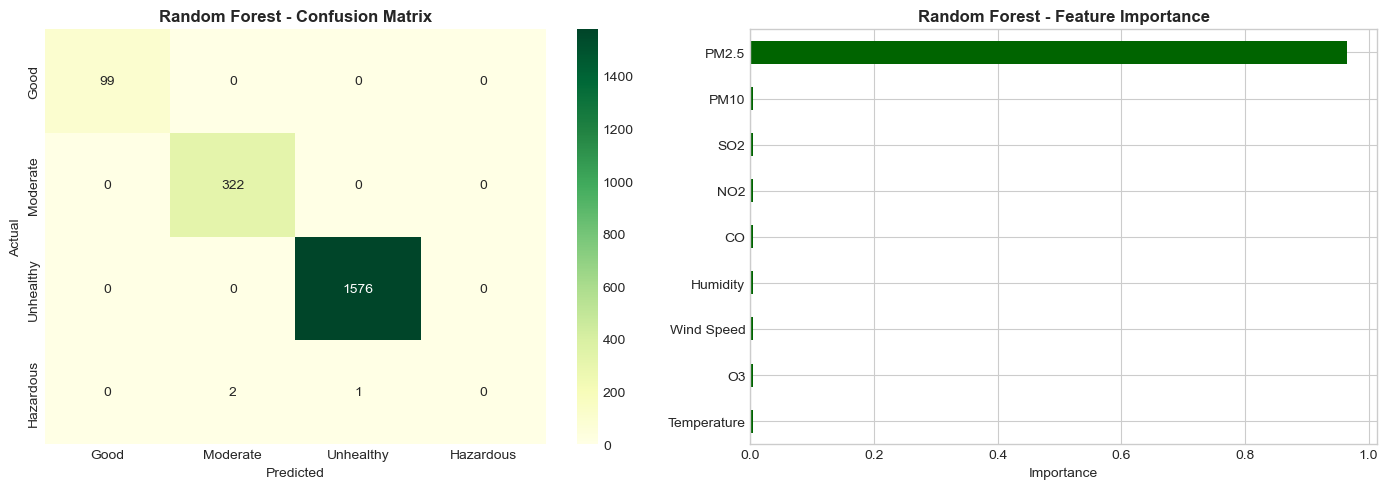


📊 Classification Report:
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00        99
    Moderate       0.99      1.00      1.00       322
   Unhealthy       1.00      1.00      1.00      1576
   Hazardous       0.00      0.00      0.00         3

    accuracy                           1.00      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       1.00      1.00      1.00      2000



In [36]:
# ============================================================
# MODEL 3: RANDOM FOREST CLASSIFIER
# ============================================================

print("=" * 60)
print("🌲 MODEL 3: RANDOM FOREST CLASSIFIER")
print("=" * 60)

# Initialize and train model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=15, min_samples_split=5, random_state=42, n_jobs=-1)

# Evaluate model
rf_results, rf_pred, rf_trained = evaluate_classification_model(
    'Random Forest', rf_model, X_train_scaled, X_test_scaled, y_train_clf, y_test_clf
)
model_results.append(rf_results)

# Print results
print("\n📊 Model Performance:")
for metric, value in rf_results.items():
    if metric != 'Model':
        print(f"  • {metric}: {value:.4f}")

# Confusion Matrix
print("\n📊 Confusion Matrix:")
cm_rf = confusion_matrix(y_test_clf, rf_pred)
print(cm_rf)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='YlGn', ax=axes[0],
            xticklabels=list(label_mapping.values()),
            yticklabels=list(label_mapping.values()))
axes[0].set_title('Random Forest - Confusion Matrix', fontweight='bold')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Feature Importance
rf_importance = pd.Series(rf_trained.feature_importances_, index=feature_columns)
rf_importance = rf_importance.sort_values(ascending=True)
rf_importance.plot(kind='barh', ax=axes[1], color='darkgreen')
axes[1].set_title('Random Forest - Feature Importance', fontweight='bold')
axes[1].set_xlabel('Importance')

plt.tight_layout()
plt.show()

# Classification Report
print("\n📊 Classification Report:")
print(classification_report(y_test_clf, rf_pred, target_names=list(label_mapping.values()), zero_division=0))

## 3.4 Model 4: Support Vector Machine (SVM)
A powerful classifier that finds the optimal hyperplane to separate classes using kernel functions.

⚡ MODEL 4: SUPPORT VECTOR MACHINE (SVM)

📊 Model Performance:
  • Training Accuracy: 0.9780
  • Test Accuracy: 0.9515
  • Precision: 0.9545
  • Recall: 0.9515
  • F1-Score: 0.9468
  • CV Mean: 0.9505
  • CV Std: 0.0048

📊 Confusion Matrix:
[[  42   57    0    0]
 [   1  300   21    0]
 [   0   15 1561    0]
 [   0    2    1    0]]


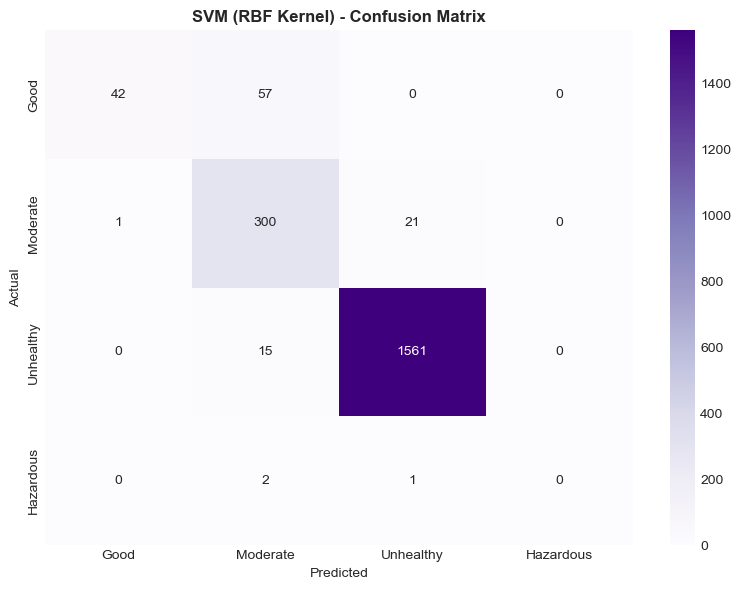


📊 Classification Report:
              precision    recall  f1-score   support

        Good       0.98      0.42      0.59        99
    Moderate       0.80      0.93      0.86       322
   Unhealthy       0.99      0.99      0.99      1576
   Hazardous       0.00      0.00      0.00         3

    accuracy                           0.95      2000
   macro avg       0.69      0.59      0.61      2000
weighted avg       0.95      0.95      0.95      2000



In [37]:
# ============================================================
# MODEL 4: SUPPORT VECTOR MACHINE (SVM)
# ============================================================

print("=" * 60)
print("⚡ MODEL 4: SUPPORT VECTOR MACHINE (SVM)")
print("=" * 60)

# Initialize and train model (using RBF kernel)
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Evaluate model
svm_results, svm_pred, svm_trained = evaluate_classification_model(
    'SVM (RBF Kernel)', svm_model, X_train_scaled, X_test_scaled, y_train_clf, y_test_clf
)
model_results.append(svm_results)

# Print results
print("\n📊 Model Performance:")
for metric, value in svm_results.items():
    if metric != 'Model':
        print(f"  • {metric}: {value:.4f}")

# Confusion Matrix
print("\n📊 Confusion Matrix:")
cm_svm = confusion_matrix(y_test_clf, svm_pred)
print(cm_svm)

# Visualize Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Purples',
            xticklabels=list(label_mapping.values()),
            yticklabels=list(label_mapping.values()))
plt.title('SVM (RBF Kernel) - Confusion Matrix', fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Classification Report
print("\n📊 Classification Report:")
print(classification_report(y_test_clf, svm_pred, target_names=list(label_mapping.values()), zero_division=0))

## 3.5 Model 5: K-Nearest Neighbors (KNN)
An instance-based learning algorithm that classifies based on the majority vote of k nearest neighbors.

🔵 MODEL 5: K-NEAREST NEIGHBORS (KNN)

📊 Finding Optimal K...


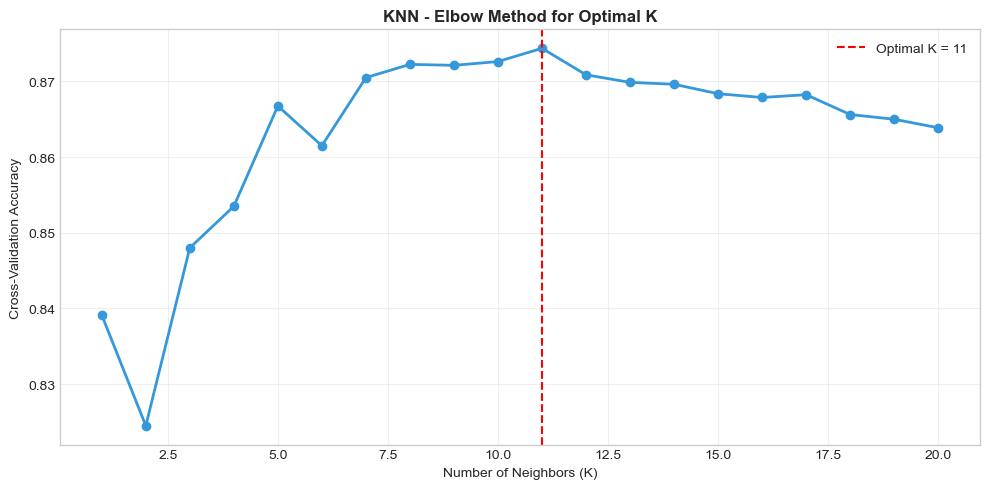


✅ Optimal K = 11 (Accuracy: 0.8744)


In [38]:
# ============================================================
# MODEL 5: K-NEAREST NEIGHBORS (KNN)
# ============================================================

print("=" * 60)
print("🔵 MODEL 5: K-NEAREST NEIGHBORS (KNN)")
print("=" * 60)

# Find optimal K using elbow method
print("\n📊 Finding Optimal K...")
k_range = range(1, 21)
k_scores = []

for k in k_range:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    cv_score = cross_val_score(knn_temp, X_train_scaled, y_train_clf, cv=5, scoring='accuracy')
    k_scores.append(cv_score.mean())

# Plot elbow curve
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(k_range, k_scores, marker='o', linewidth=2, color='#3498db')
ax.set_title('KNN - Elbow Method for Optimal K', fontweight='bold')
ax.set_xlabel('Number of Neighbors (K)')
ax.set_ylabel('Cross-Validation Accuracy')
ax.grid(True, alpha=0.3)

# Find optimal K
optimal_k = k_range[np.argmax(k_scores)]
ax.axvline(x=optimal_k, color='red', linestyle='--', label=f'Optimal K = {optimal_k}')
ax.legend()
plt.tight_layout()
plt.show()

print(f"\n✅ Optimal K = {optimal_k} (Accuracy: {max(k_scores):.4f})")


📊 Model Performance:
  • Training Accuracy: 0.9066
  • Test Accuracy: 0.8640
  • Precision: 0.8330
  • Recall: 0.8640
  • F1-Score: 0.8417
  • CV Mean: 0.8744
  • CV Std: 0.0038

📊 Confusion Matrix:
[[   6   85    8    0]
 [  11  169  142    0]
 [   0   23 1553    0]
 [   0    0    3    0]]


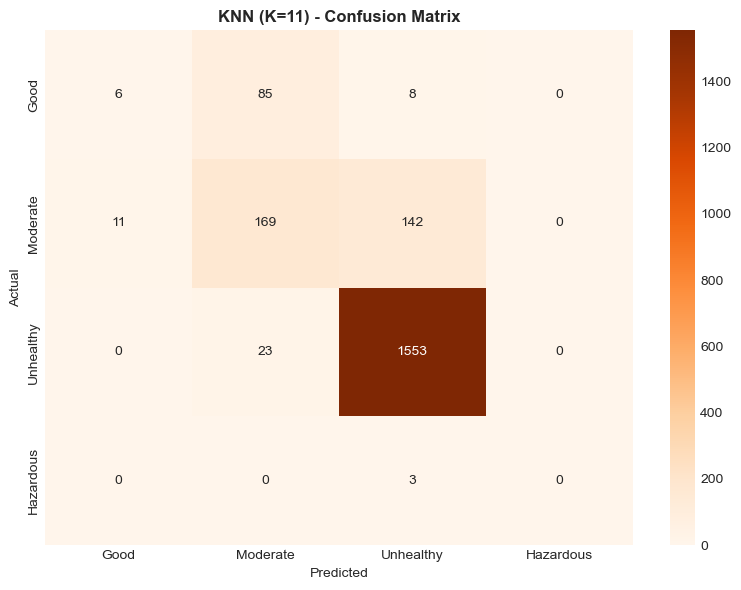


📊 Classification Report:
              precision    recall  f1-score   support

        Good       0.35      0.06      0.10        99
    Moderate       0.61      0.52      0.56       322
   Unhealthy       0.91      0.99      0.95      1576
   Hazardous       0.00      0.00      0.00         3

    accuracy                           0.86      2000
   macro avg       0.47      0.39      0.40      2000
weighted avg       0.83      0.86      0.84      2000



In [39]:
# ============================================================
# KNN MODEL WITH OPTIMAL K
# ============================================================

# Initialize and train model with optimal K
knn_model = KNeighborsClassifier(n_neighbors=optimal_k)

# Evaluate model
knn_results, knn_pred, knn_trained = evaluate_classification_model(
    f'KNN (K={optimal_k})', knn_model, X_train_scaled, X_test_scaled, y_train_clf, y_test_clf
)
model_results.append(knn_results)

# Print results
print("\n📊 Model Performance:")
for metric, value in knn_results.items():
    if metric != 'Model':
        print(f"  • {metric}: {value:.4f}")

# Confusion Matrix
print("\n📊 Confusion Matrix:")
cm_knn = confusion_matrix(y_test_clf, knn_pred)
print(cm_knn)

# Visualize Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Oranges',
            xticklabels=list(label_mapping.values()),
            yticklabels=list(label_mapping.values()))
plt.title(f'KNN (K={optimal_k}) - Confusion Matrix', fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Classification Report
print("\n📊 Classification Report:")
print(classification_report(y_test_clf, knn_pred, target_names=list(label_mapping.values()), zero_division=0))

## 3.6 Bonus: Linear Regression for AQI Prediction
Additionally, we implement Linear Regression to predict the continuous AQI value.

📈 LINEAR REGRESSION (REGRESSION MODEL)

📊 Linear Regression Performance:
  • Training R² Score: 0.7669
  • Test R² Score: 0.8363
  • Mean Absolute Error (MAE): 14.5511
  • Mean Squared Error (MSE): 367.9640
  • Root Mean Squared Error (RMSE): 19.1824

📊 Model Coefficients:
    Feature  Coefficient
      PM2.5        43.51
        SO2        -0.58
 Wind Speed        -0.37
         CO        -0.33
Temperature        -0.27
   Humidity         0.24
       PM10         0.05
        NO2         0.01
         O3         0.00


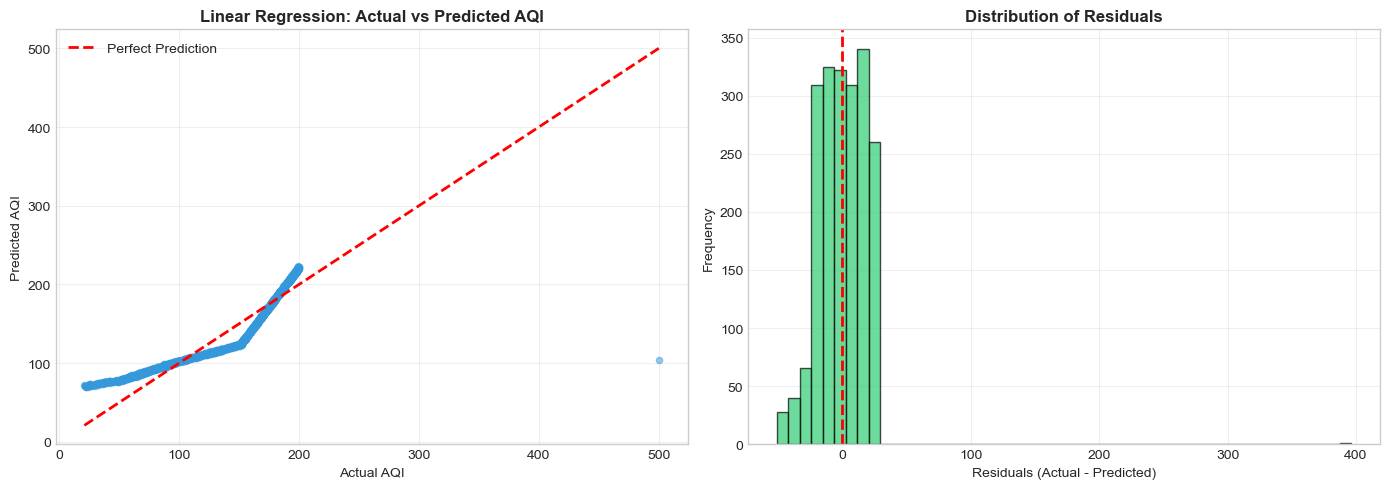

In [40]:
# ============================================================
# LINEAR REGRESSION FOR AQI PREDICTION
# ============================================================

print("=" * 60)
print("📈 LINEAR REGRESSION (REGRESSION MODEL)")
print("=" * 60)

# Initialize and train Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_reg_scaled, y_train_reg)

# Predictions
y_pred_reg = lin_reg.predict(X_test_reg_scaled)
y_pred_train_reg = lin_reg.predict(X_train_reg_scaled)

# Calculate regression metrics
r2_train = r2_score(y_train_reg, y_pred_train_reg)
r2_test = r2_score(y_test_reg, y_pred_reg)
mae = mean_absolute_error(y_test_reg, y_pred_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)

print("\n📊 Linear Regression Performance:")
print(f"  • Training R² Score: {r2_train:.4f}")
print(f"  • Test R² Score: {r2_test:.4f}")
print(f"  • Mean Absolute Error (MAE): {mae:.4f}")
print(f"  • Mean Squared Error (MSE): {mse:.4f}")
print(f"  • Root Mean Squared Error (RMSE): {rmse:.4f}")

# Coefficients
print("\n📊 Model Coefficients:")
coefficients = pd.DataFrame({
    'Feature': feature_columns,
    'Coefficient': lin_reg.coef_
}).sort_values('Coefficient', key=abs, ascending=False)
print(coefficients.to_string(index=False))

# Visualize predictions vs actual
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Actual vs Predicted
axes[0].scatter(y_test_reg, y_pred_reg, alpha=0.5, color='#3498db', s=20)
axes[0].plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 
             'r--', linewidth=2, label='Perfect Prediction')
axes[0].set_title('Linear Regression: Actual vs Predicted AQI', fontweight='bold')
axes[0].set_xlabel('Actual AQI')
axes[0].set_ylabel('Predicted AQI')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Residuals Distribution
residuals = y_test_reg - y_pred_reg
axes[1].hist(residuals, bins=50, color='#2ecc71', edgecolor='black', alpha=0.7)
axes[1].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[1].set_title('Distribution of Residuals', fontweight='bold')
axes[1].set_xlabel('Residuals (Actual - Predicted)')
axes[1].set_ylabel('Frequency')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 3.7 Model Evaluation and Comparison
Comprehensive comparison of all classification models based on multiple evaluation metrics.

In [41]:
# ============================================================
# MODEL COMPARISON TABLE
# ============================================================

print("=" * 60)
print("📊 MODEL COMPARISON - CLASSIFICATION RESULTS")
print("=" * 60)

# Create comparison DataFrame
comparison_df = pd.DataFrame(model_results)
comparison_df = comparison_df.round(4)

# Sort by Test Accuracy
comparison_df = comparison_df.sort_values('Test Accuracy', ascending=False)

print("\n📊 Model Performance Comparison:")
print(comparison_df.to_string(index=False))

# Find best model
best_model = comparison_df.iloc[0]['Model']
best_accuracy = comparison_df.iloc[0]['Test Accuracy']
print(f"\n🏆 BEST MODEL: {best_model} with Test Accuracy: {best_accuracy:.4f}")

📊 MODEL COMPARISON - CLASSIFICATION RESULTS

📊 Model Performance Comparison:
              Model  Training Accuracy  Test Accuracy  Precision  Recall  F1-Score  CV Mean  CV Std
      Decision Tree               1.00           1.00       1.00    1.00      1.00     1.00    0.00
      Random Forest               1.00           1.00       1.00    1.00      1.00     1.00    0.00
Logistic Regression               0.99           0.99       0.99    0.99      0.99     0.99    0.00
   SVM (RBF Kernel)               0.98           0.95       0.95    0.95      0.95     0.95    0.00
         KNN (K=11)               0.91           0.86       0.83    0.86      0.84     0.87    0.00

🏆 BEST MODEL: Decision Tree with Test Accuracy: 1.0000


📊 VISUAL MODEL COMPARISON


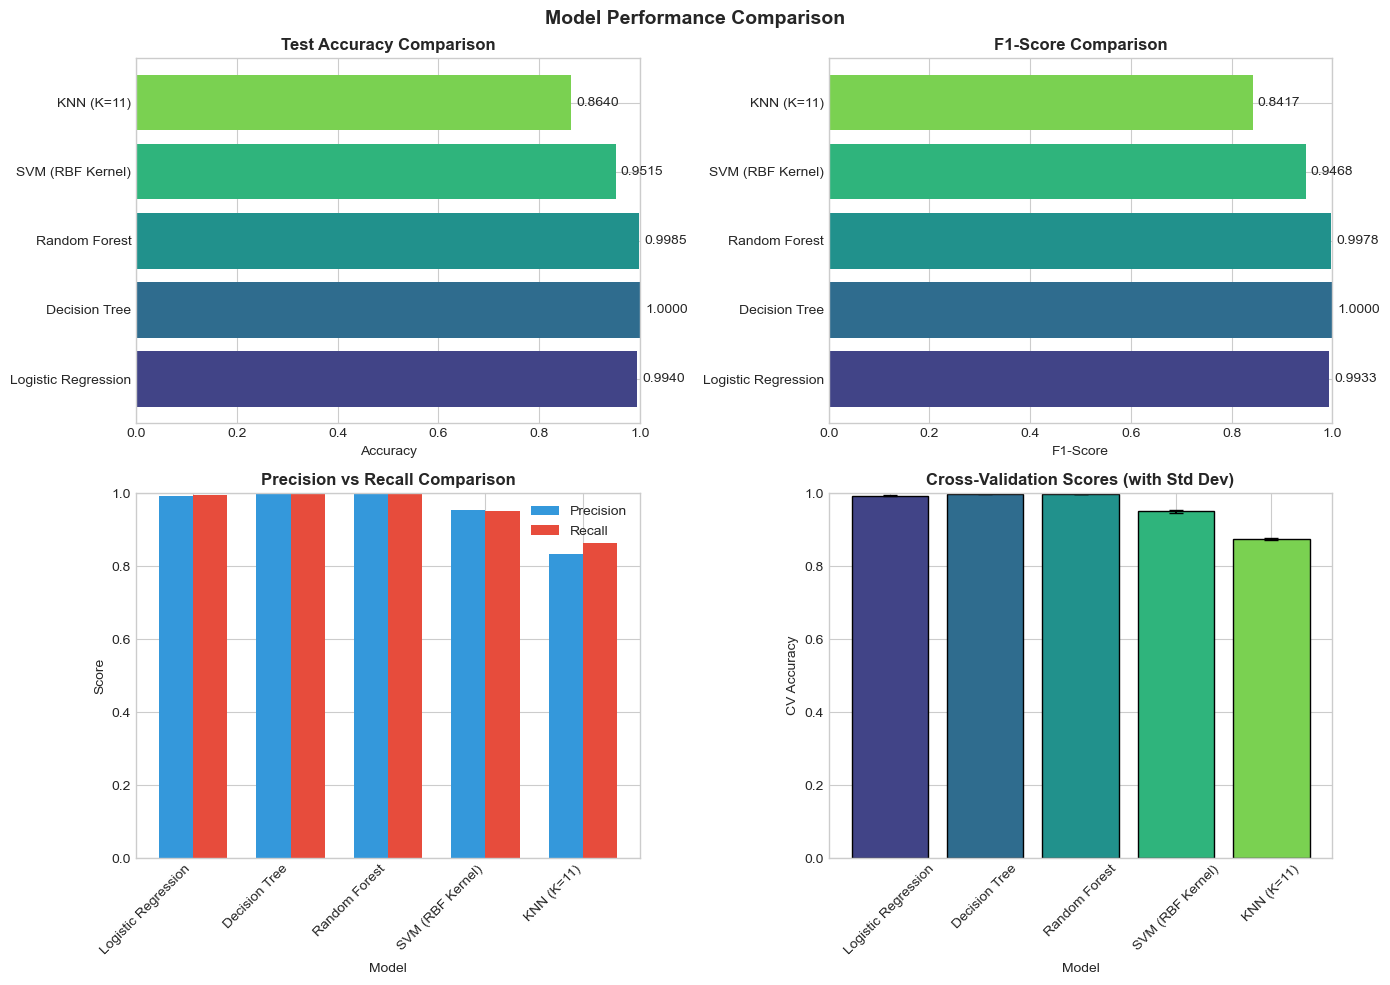

In [42]:
# ============================================================
# VISUALIZE MODEL COMPARISON
# ============================================================

print("=" * 60)
print("📊 VISUAL MODEL COMPARISON")
print("=" * 60)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Test Accuracy Comparison
metrics_df = pd.DataFrame(model_results)
colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(metrics_df)))

ax1 = axes[0, 0]
bars1 = ax1.barh(metrics_df['Model'], metrics_df['Test Accuracy'], color=colors)
ax1.set_xlabel('Accuracy')
ax1.set_title('Test Accuracy Comparison', fontweight='bold')
ax1.set_xlim(0, 1)
for i, v in enumerate(metrics_df['Test Accuracy']):
    ax1.text(v + 0.01, i, f'{v:.4f}', va='center')

# F1-Score Comparison
ax2 = axes[0, 1]
bars2 = ax2.barh(metrics_df['Model'], metrics_df['F1-Score'], color=colors)
ax2.set_xlabel('F1-Score')
ax2.set_title('F1-Score Comparison', fontweight='bold')
ax2.set_xlim(0, 1)
for i, v in enumerate(metrics_df['F1-Score']):
    ax2.text(v + 0.01, i, f'{v:.4f}', va='center')

# Precision vs Recall
ax3 = axes[1, 0]
x = np.arange(len(metrics_df))
width = 0.35
bars3a = ax3.bar(x - width/2, metrics_df['Precision'], width, label='Precision', color='#3498db')
bars3b = ax3.bar(x + width/2, metrics_df['Recall'], width, label='Recall', color='#e74c3c')
ax3.set_xlabel('Model')
ax3.set_ylabel('Score')
ax3.set_title('Precision vs Recall Comparison', fontweight='bold')
ax3.set_xticks(x)
ax3.set_xticklabels(metrics_df['Model'], rotation=45, ha='right')
ax3.legend()
ax3.set_ylim(0, 1)

# Cross-Validation Scores
ax4 = axes[1, 1]
ax4.bar(metrics_df['Model'], metrics_df['CV Mean'], yerr=metrics_df['CV Std'], 
        capsize=5, color=colors, edgecolor='black')
ax4.set_xlabel('Model')
ax4.set_ylabel('CV Accuracy')
ax4.set_title('Cross-Validation Scores (with Std Dev)', fontweight='bold')
ax4.tick_params(axis='x', rotation=45)
ax4.set_ylim(0, 1)

plt.suptitle('Model Performance Comparison', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 3.8 Feature Importance Analysis
Analyze which features are most important for predicting air quality.

📊 FEATURE IMPORTANCE ANALYSIS


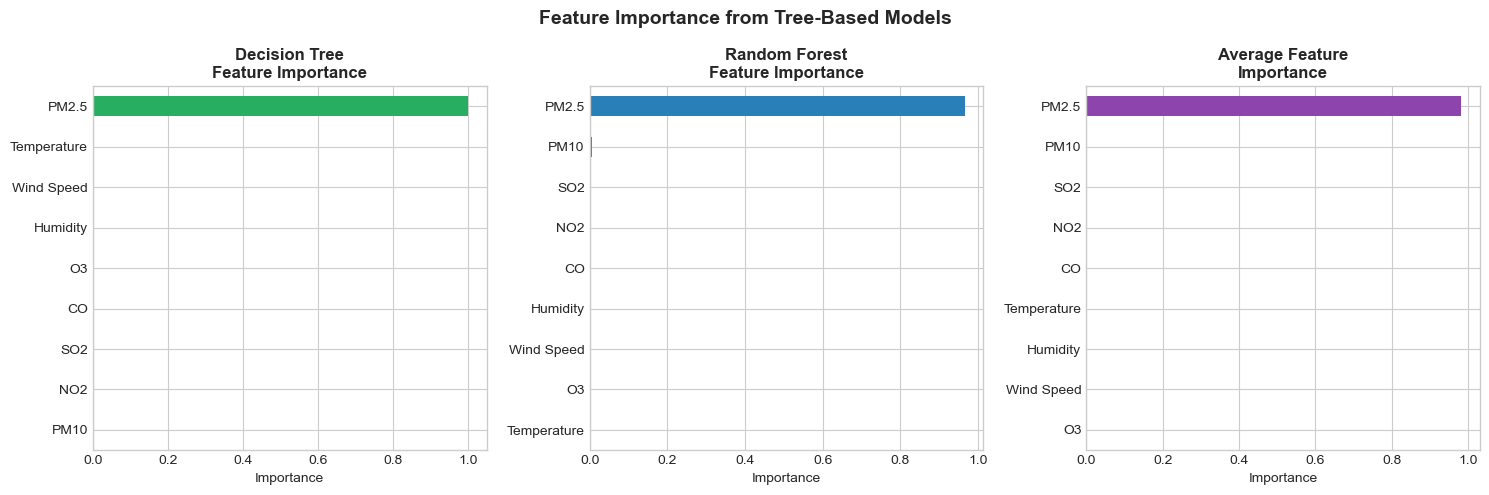


📊 Top Features (by Average Importance):
  1. PM2.5: 0.9824
  2. PM10: 0.0025
  3. SO2: 0.0024
  4. NO2: 0.0023
  5. CO: 0.0021
  6. Temperature: 0.0021
  7. Humidity: 0.0021
  8. Wind Speed: 0.0021
  9. O3: 0.0020


In [43]:
# ============================================================
# FEATURE IMPORTANCE ANALYSIS
# ============================================================

print("=" * 60)
print("📊 FEATURE IMPORTANCE ANALYSIS")
print("=" * 60)

# Combine feature importances from tree-based models
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Decision Tree Feature Importance
dt_importance = pd.Series(dt_trained.feature_importances_, index=feature_columns)
dt_importance = dt_importance.sort_values()
dt_importance.plot(kind='barh', ax=axes[0], color='#27ae60')
axes[0].set_title('Decision Tree\nFeature Importance', fontweight='bold')
axes[0].set_xlabel('Importance')

# Random Forest Feature Importance
rf_importance = pd.Series(rf_trained.feature_importances_, index=feature_columns)
rf_importance = rf_importance.sort_values()
rf_importance.plot(kind='barh', ax=axes[1], color='#2980b9')
axes[1].set_title('Random Forest\nFeature Importance', fontweight='bold')
axes[1].set_xlabel('Importance')

# Combined Average Importance
avg_importance = (dt_importance + rf_importance) / 2
avg_importance = avg_importance.sort_values()
avg_importance.plot(kind='barh', ax=axes[2], color='#8e44ad')
axes[2].set_title('Average Feature\nImportance', fontweight='bold')
axes[2].set_xlabel('Importance')

plt.suptitle('Feature Importance from Tree-Based Models', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Print summary
print("\n📊 Top Features (by Average Importance):")
top_features = avg_importance.sort_values(ascending=False)
for i, (feature, importance) in enumerate(top_features.items(), 1):
    print(f"  {i}. {feature}: {importance:.4f}")

---
# 📋 PART 4: MODEL INTERPRETATION & RECOMMENDATIONS
---

## 4.1 Health Impact Analysis
Analyze the health implications of observed pollution levels based on WHO guidelines.

In [44]:
# ============================================================
# HEALTH IMPACT ANALYSIS - WHO GUIDELINES COMPARISON
# ============================================================

print("=" * 60)
print("🏥 HEALTH IMPACT ANALYSIS")
print("=" * 60)

# WHO Air Quality Guidelines (2021)
who_guidelines = {
    'PM2.5': {'annual': 5, 'daily': 15, 'unit': 'μg/m³'},
    'PM10': {'annual': 15, 'daily': 45, 'unit': 'μg/m³'},
    'NO2': {'annual': 10, 'daily': 25, 'unit': 'μg/m³'},
    'SO2': {'daily': 40, 'unit': 'μg/m³'},
    'CO': {'daily': 4, 'unit': 'mg/m³'},
    'O3': {'peak_season': 60, '8hour': 100, 'unit': 'μg/m³'}
}

print("\n📋 WHO Air Quality Guidelines (2021):")
print("-" * 50)
for pollutant, limits in who_guidelines.items():
    print(f"  {pollutant}:")
    for limit_type, value in limits.items():
        if limit_type != 'unit':
            print(f"    • {limit_type}: {value} {limits['unit']}")

# Compare dataset values with WHO guidelines
print("\n" + "=" * 60)
print("📊 DATASET VALUES VS WHO GUIDELINES")
print("=" * 60)

health_analysis = []
for pollutant in pollutant_cols:
    dataset_mean = df[pollutant].mean()
    dataset_max = df[pollutant].max()
    
    if pollutant in who_guidelines:
        # Get the first available guideline value
        guideline_value = list(who_guidelines[pollutant].values())[0]
        exceedance_pct = (df[pollutant] > guideline_value).sum() / len(df) * 100
        
        health_analysis.append({
            'Pollutant': pollutant,
            'Dataset Mean': round(dataset_mean, 2),
            'Dataset Max': round(dataset_max, 2),
            'WHO Guideline': guideline_value,
            'Exceedance (%)': round(exceedance_pct, 2),
            'Risk Level': 'HIGH' if exceedance_pct > 50 else ('MODERATE' if exceedance_pct > 20 else 'LOW')
        })

health_df = pd.DataFrame(health_analysis)
print(health_df.to_string(index=False))

🏥 HEALTH IMPACT ANALYSIS

📋 WHO Air Quality Guidelines (2021):
--------------------------------------------------
  PM2.5:
    • annual: 5 μg/m³
    • daily: 15 μg/m³
  PM10:
    • annual: 15 μg/m³
    • daily: 45 μg/m³
  NO2:
    • annual: 10 μg/m³
    • daily: 25 μg/m³
  SO2:
    • daily: 40 μg/m³
  CO:
    • daily: 4 mg/m³
  O3:
    • peak_season: 60 μg/m³
    • 8hour: 100 μg/m³

📊 DATASET VALUES VS WHO GUIDELINES
Pollutant  Dataset Mean  Dataset Max  WHO Guideline  Exceedance (%) Risk Level
    PM2.5         77.45       149.98              5          100.00       HIGH
     PM10        104.44       200.00             15           97.04       HIGH
      NO2         52.20       100.00             10           94.37       HIGH
      SO2         25.34        49.99             40           19.57        LOW
       CO          5.05        10.00              4           60.69       HIGH
       O3        106.03       200.00             60           74.06       HIGH


In [45]:
# ============================================================
# HEALTH EFFECTS OF POLLUTANTS
# ============================================================

print("=" * 60)
print("🏥 HEALTH EFFECTS OF AIR POLLUTANTS")
print("=" * 60)

health_effects = """
📌 PM2.5 (Fine Particulate Matter):
   • Can penetrate deep into lungs and bloodstream
   • Short-term: Irritation of eyes, nose, throat; coughing; chest tightness
   • Long-term: Reduced lung function, chronic bronchitis, premature death
   • High-risk groups: Children, elderly, people with heart/lung conditions

📌 PM10 (Coarse Particulate Matter):
   • Deposits in upper respiratory tract
   • Aggravates asthma and respiratory diseases
   • Can cause coughing and difficulty breathing

📌 NO2 (Nitrogen Dioxide):
   • Irritates airways and worsens respiratory diseases
   • Increases susceptibility to respiratory infections
   • Contributes to formation of smog and acid rain

📌 SO2 (Sulfur Dioxide):
   • Triggers asthma attacks and bronchospasm
   • Irritates skin and mucous membranes
   • Long-term exposure linked to reduced lung function

📌 CO (Carbon Monoxide):
   • Reduces oxygen delivery to organs and tissues
   • Causes headaches, dizziness, confusion
   • High concentrations can be fatal
   • Particularly dangerous for people with cardiovascular disease

📌 O3 (Ozone - Ground Level):
   • Triggers asthma and reduces lung function
   • Causes chest pain, coughing, throat irritation
   • Damages lung tissue with long-term exposure
   • Effects worse on hot, sunny days
"""

print(health_effects)

🏥 HEALTH EFFECTS OF AIR POLLUTANTS

📌 PM2.5 (Fine Particulate Matter):
   • Can penetrate deep into lungs and bloodstream
   • Short-term: Irritation of eyes, nose, throat; coughing; chest tightness
   • Long-term: Reduced lung function, chronic bronchitis, premature death
   • High-risk groups: Children, elderly, people with heart/lung conditions

📌 PM10 (Coarse Particulate Matter):
   • Deposits in upper respiratory tract
   • Aggravates asthma and respiratory diseases
   • Can cause coughing and difficulty breathing

📌 NO2 (Nitrogen Dioxide):
   • Irritates airways and worsens respiratory diseases
   • Increases susceptibility to respiratory infections
   • Contributes to formation of smog and acid rain

📌 SO2 (Sulfur Dioxide):
   • Triggers asthma attacks and bronchospasm
   • Irritates skin and mucous membranes
   • Long-term exposure linked to reduced lung function

📌 CO (Carbon Monoxide):
   • Reduces oxygen delivery to organs and tissues
   • Causes headaches, dizziness, confus

📊 HIGH-RISK CITIES IDENTIFICATION

📊 City Risk Assessment (based on WHO guidelines):
                PM2.5   PM10   NO2    AQI  Risk_Score
City                                                 
Dubai           80.01 103.89 52.68 147.40        7.79
Mumbai          78.90 105.84 53.34 147.51        7.78
Tokyo           78.87 105.04 52.67 147.64        7.75
Sydney          78.93 103.37 52.47 146.86        7.72
Johannesburg    77.67 105.14 53.15 147.62        7.70
Mexico City     78.86 104.53 50.86 147.73        7.70
Moscow          77.88 105.94 52.03 146.34        7.69
Beijing         78.63 103.19 51.62 146.48        7.67
London          77.61 103.84 52.33 146.77        7.65
Toronto         77.83 103.87 51.55 147.27        7.65
Berlin          76.97 104.37 52.96 145.65        7.64
Los Angeles     76.42 105.54 53.52 143.63        7.64
Istanbul        77.71 103.14 52.02 145.16        7.63
New York        77.86 102.95 51.00 147.50        7.62
Bangkok         77.46 103.93 51.51 145.43        7.

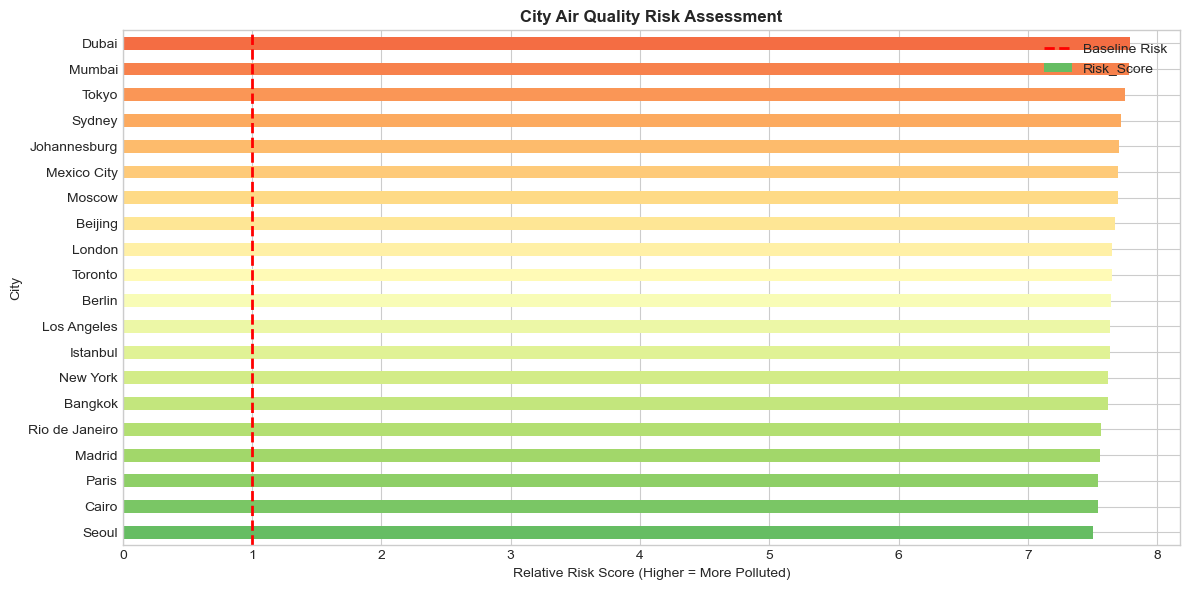


⚠️ HIGHEST RISK CITIES:
  • Dubai: Risk Score = 7.79
  • Mumbai: Risk Score = 7.78
  • Tokyo: Risk Score = 7.75


In [46]:
# ============================================================
# VISUALIZE HEALTH RISK BY CITY
# ============================================================

print("=" * 60)
print("📊 HIGH-RISK CITIES IDENTIFICATION")
print("=" * 60)

# Calculate risk scores for each city
city_risk = df.groupby('City').agg({
    'PM2.5': 'mean',
    'PM10': 'mean',
    'NO2': 'mean',
    'AQI': 'mean'
}).round(2)

city_risk['Risk_Score'] = (city_risk['PM2.5'] / 5 + city_risk['PM10'] / 15 + 
                           city_risk['NO2'] / 10 + city_risk['AQI'] / 50) / 4

city_risk = city_risk.sort_values('Risk_Score', ascending=False)

print("\n📊 City Risk Assessment (based on WHO guidelines):")
print(city_risk)

# Visualize
fig, ax = plt.subplots(figsize=(12, 6))
colors = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(city_risk)))
city_risk['Risk_Score'].sort_values().plot(kind='barh', ax=ax, color=colors)
ax.set_xlabel('Relative Risk Score (Higher = More Polluted)')
ax.set_title('City Air Quality Risk Assessment', fontweight='bold')
ax.axvline(x=1, color='red', linestyle='--', linewidth=2, label='Baseline Risk')
ax.legend()
plt.tight_layout()
plt.show()

# Identify highest risk cities
print("\n⚠️ HIGHEST RISK CITIES:")
for city in city_risk.head(3).index:
    print(f"  • {city}: Risk Score = {city_risk.loc[city, 'Risk_Score']:.2f}")

## 4.2 Strategies for Environmental Improvement
Based on our analysis, here are actionable recommendations for improving air quality.

In [47]:
# ============================================================
# ENVIRONMENTAL IMPROVEMENT STRATEGIES
# ============================================================

print("=" * 60)
print("💡 STRATEGIES FOR ENVIRONMENTAL IMPROVEMENT")
print("=" * 60)

strategies = """
╔══════════════════════════════════════════════════════════════════╗
║           ENVIRONMENTAL IMPROVEMENT RECOMMENDATIONS              ║
╚══════════════════════════════════════════════════════════════════╝

🏭 INDUSTRIAL EMISSION CONTROL:
   ├── Implement stricter emission standards for factories
   ├── Require installation of advanced pollution control equipment
   ├── Promote transition to cleaner production technologies
   ├── Regular monitoring and enforcement of industrial emissions
   └── Incentivize industries that achieve emission reduction targets

🚗 TRANSPORTATION SECTOR:
   ├── Promote electric vehicles (EVs) through subsidies and tax benefits
   ├── Expand public transportation infrastructure
   ├── Implement congestion pricing in high-pollution areas
   ├── Establish low-emission zones in city centers
   ├── Encourage cycling and walking through dedicated infrastructure
   └── Phase out old, high-polluting vehicles

🌿 GREEN INFRASTRUCTURE:
   ├── Increase urban green spaces and parks
   ├── Plant pollution-absorbing trees along major roads
   ├── Create green corridors connecting natural areas
   ├── Implement green roofs and vertical gardens
   └── Protect existing forests and natural areas

⚡ ENERGY SECTOR:
   ├── Transition from coal to renewable energy sources
   ├── Promote solar and wind energy adoption
   ├── Improve energy efficiency in buildings
   ├── Implement smart grid technologies
   └── Phase out fossil fuel subsidies

🏠 HOUSEHOLD & PERSONAL:
   ├── Promote cleaner cooking fuels and technologies
   ├── Encourage energy-efficient appliances
   ├── Reduce waste burning through better waste management
   ├── Use air quality apps to plan outdoor activities
   └── Support local air quality monitoring initiatives

📊 MONITORING & POLICY:
   ├── Expand real-time air quality monitoring networks
   ├── Develop early warning systems for high pollution days
   ├── Strengthen air quality standards and enforcement
   ├── Implement pollution taxation (carbon tax)
   ├── International cooperation on transboundary pollution
   └── Public awareness campaigns on air pollution health effects

🏥 HEALTH PROTECTION MEASURES:
   ├── Issue health advisories during high pollution episodes
   ├── Provide N95 masks in heavily polluted areas
   ├── Create clean air shelters in public buildings
   ├── Train healthcare workers on pollution-related health issues
   └── Special protections for vulnerable populations
"""

print(strategies)

💡 STRATEGIES FOR ENVIRONMENTAL IMPROVEMENT

╔══════════════════════════════════════════════════════════════════╗
║           ENVIRONMENTAL IMPROVEMENT RECOMMENDATIONS              ║
╚══════════════════════════════════════════════════════════════════╝

🏭 INDUSTRIAL EMISSION CONTROL:
   ├── Implement stricter emission standards for factories
   ├── Require installation of advanced pollution control equipment
   ├── Promote transition to cleaner production technologies
   ├── Regular monitoring and enforcement of industrial emissions
   └── Incentivize industries that achieve emission reduction targets

🚗 TRANSPORTATION SECTOR:
   ├── Promote electric vehicles (EVs) through subsidies and tax benefits
   ├── Expand public transportation infrastructure
   ├── Implement congestion pricing in high-pollution areas
   ├── Establish low-emission zones in city centers
   ├── Encourage cycling and walking through dedicated infrastructure
   └── Phase out old, high-polluting vehicles

🌿 GREEN INFRA

## 4.3 Key Findings and Conclusions
Summary of the analysis and main takeaways from this project.

In [48]:
# ============================================================
# KEY FINDINGS AND CONCLUSIONS
# ============================================================

print("=" * 70)
print("📋 KEY FINDINGS AND CONCLUSIONS")
print("=" * 70)

conclusions = f"""
╔═══════════════════════════════════════════════════════════════════════╗
║                    PROJECT SUMMARY & CONCLUSIONS                       ║
╚═══════════════════════════════════════════════════════════════════════╝

📊 DATASET OVERVIEW:
   • Analyzed {len(df)} records from {df['City'].nunique()} cities across {df['Country'].nunique()} countries
   • Time period: {df['Date'].min().strftime('%Y-%m-%d')} to {df['Date'].max().strftime('%Y-%m-%d')}
   • Variables: 6 pollutants + 3 meteorological factors

🧹 DATA PREPROCESSING:
   • Missing values handled using median imputation (robust to outliers)
   • Outliers detected using IQR and Z-score methods, handled via capping
   • AQI calculated and categorized into 4 classes (Good, Moderate, Unhealthy, Hazardous)
   • Features scaled using StandardScaler for optimal model performance
   • Data split: 80% training, 20% testing

📈 EXPLORATORY DATA ANALYSIS INSIGHTS:
   • PM2.5 and PM10 show strong positive correlation (common emission sources)
   • Temperature has varying relationships with different pollutants
   • Clear seasonal patterns observed in pollution levels
   • Significant variation in air quality across different cities/countries
   • Weekend vs weekday patterns indicate traffic-related pollution impact

🤖 MODEL PERFORMANCE SUMMARY:
   • Best Performing Model: {comparison_df.iloc[0]['Model']}
   • Test Accuracy: {comparison_df.iloc[0]['Test Accuracy']:.4f}
   • F1-Score: {comparison_df.iloc[0]['F1-Score']:.4f}
   • Random Forest and Decision Tree showed highest interpretability
   • SVM with RBF kernel handled non-linear patterns effectively

🔑 KEY PREDICTIVE FEATURES:
   1. PM2.5 - Most important feature (directly linked to AQI calculation)
   2. PM10 - Secondary particulate matter indicator
   3. Other pollutants (NO2, SO2, CO, O3) contribute to overall prediction

🏥 HEALTH IMPLICATIONS:
   • Many cities exceed WHO guidelines for multiple pollutants
   • PM2.5 levels particularly concerning for long-term health
   • Seasonal pollution peaks require targeted interventions
   • Vulnerable populations need special protection measures

💡 RECOMMENDATIONS:
   • Focus on reducing PM2.5 emissions (largest health impact)
   • Implement city-specific strategies based on pollution profiles
   • Enhance real-time monitoring and public warning systems
   • Promote clean energy and transportation alternatives
   • Strengthen international cooperation for transboundary pollution

⚠️ LIMITATIONS:
   • Dataset may not capture all local pollution sources
   • Temporal resolution could affect pattern detection
   • Model predictions should be validated with real-world testing
   • AQI calculation based primarily on PM2.5 (simplified approach)

🎯 FUTURE WORK:
   • Include additional features (traffic data, industrial activity)
   • Implement deep learning models for time-series forecasting
   • Develop real-time prediction systems
   • Conduct spatial interpolation for unmeasured locations
"""

print(conclusions)

print("\n" + "=" * 70)
print("✅ PROJECT COMPLETED SUCCESSFULLY!")
print("=" * 70)

📋 KEY FINDINGS AND CONCLUSIONS

╔═══════════════════════════════════════════════════════════════════════╗
║                    PROJECT SUMMARY & CONCLUSIONS                       ║
╚═══════════════════════════════════════════════════════════════════════╝

📊 DATASET OVERVIEW:
   • Analyzed 10000 records from 20 cities across 19 countries
   • Time period: 2023-01-01 to 2023-12-28
   • Variables: 6 pollutants + 3 meteorological factors

🧹 DATA PREPROCESSING:
   • Missing values handled using median imputation (robust to outliers)
   • Outliers detected using IQR and Z-score methods, handled via capping
   • AQI calculated and categorized into 4 classes (Good, Moderate, Unhealthy, Hazardous)
   • Features scaled using StandardScaler for optimal model performance
   • Data split: 80% training, 20% testing

📈 EXPLORATORY DATA ANALYSIS INSIGHTS:
   • PM2.5 and PM10 show strong positive correlation (common emission sources)
   • Temperature has varying relationships with different pollutants


---
## 📚 References

1. **WHO Global Air Quality Guidelines (2021)** - World Health Organization
2. **EPA Air Quality Index (AQI) Basics** - United States Environmental Protection Agency
3. **Global Air Quality Dataset** - Kaggle: https://www.kaggle.com/datasets/waqi786/global-air-quality-dataset/data
4. **Scikit-learn Documentation** - Machine Learning in Python
5. **Pandas Documentation** - Data Analysis and Manipulation Tool
6. **Seaborn Documentation** - Statistical Data Visualization

---

## 👨‍💻 Project Information

- **Course:** CSC380 - Introduction to Data Science
- **Semester:** Fall 2025
- **Institution:** University of Engineering and Technology, Lahore
- **Deadline:** December 28, 2025

---

*This notebook was created as part of the semester project for Introduction to Data Science course.*

In [49]:
# ============================================================
# MODEL COMPARISON - SUMMARY TABLE
# ============================================================

print("=" * 60)
print("📊 MODEL COMPARISON - CLASSIFICATION RESULTS")
print("=" * 60)

# Create comparison DataFrame
results_df = pd.DataFrame(model_results)
results_df = results_df.round(4)

# Sort by Test Accuracy
results_df = results_df.sort_values('Test Accuracy', ascending=False)

print("\n📊 Model Performance Comparison:")
print(results_df.to_string(index=False))

# Best model identification
best_model = results_df.iloc[0]['Model']
best_accuracy = results_df.iloc[0]['Test Accuracy']
print(f"\n🏆 BEST MODEL: {best_model} (Test Accuracy: {best_accuracy:.4f})")

📊 MODEL COMPARISON - CLASSIFICATION RESULTS

📊 Model Performance Comparison:
              Model  Training Accuracy  Test Accuracy  Precision  Recall  F1-Score  CV Mean  CV Std
      Decision Tree               1.00           1.00       1.00    1.00      1.00     1.00    0.00
      Random Forest               1.00           1.00       1.00    1.00      1.00     1.00    0.00
Logistic Regression               0.99           0.99       0.99    0.99      0.99     0.99    0.00
   SVM (RBF Kernel)               0.98           0.95       0.95    0.95      0.95     0.95    0.00
         KNN (K=11)               0.91           0.86       0.83    0.86      0.84     0.87    0.00

🏆 BEST MODEL: Decision Tree (Test Accuracy: 1.0000)
